# DS 7331 - Lab 1 (Video Game Sales with Ratings Dataset Analysis)

## Eric Graham

# Introduction

The purpose of this analysis is to explore the factors that contribute to critical ratings of video games. Through exploratory data analysis, I examined patterns in game characteristics and their relationship to critical quality. After cleaning and preprocessing the data, I then fit  PCA and LDA models to identify the most impactful features driving overall variance in the dataset and to determine whether feature combinations could effectively predict critical response to a game.

# Dataset Information and Package Versions

This project uses the [Video Games Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) dataset from Kaggle.

The Python and library versions used in this notebook are as follows:

Python Version 3.10.18

numpy==2.2.6

pandas==2.3.2

matplotlib==3.10.6

seaborn==0.13.2

scikit-learn==1.7.2

# Environment Setup

## Import Libraries

In [1]:
%matplotlib inline

import sys
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

print(f"Python Version {sys.version.split()[0]}")
print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sk.__version__}")

Python Version 3.10.18
numpy==2.2.6
pandas==2.3.2
matplotlib==3.10.6
seaborn==0.13.2
scikit-learn==1.7.2


## Random Seed

In [2]:
random.seed(10)

## Plot Formatting

In [3]:
plt.style.use('dark_background')
sns.set_style("whitegrid")

colors = ['#a7c080', '#7fbbb3', '#e69875', '#d699b6', '#83c092', '#dbbc7f', '#e67e80']
sns.set_palette(colors)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '#2e353a'
plt.rcParams['axes.facecolor'] = '#2e353a'
plt.rcParams['text.color'] = '#d3c6aa'
plt.rcParams['axes.labelcolor'] = '#d3c6aa'
plt.rcParams['xtick.color'] = '#d3c6aa'
plt.rcParams['ytick.color'] = '#d3c6aa'

# Part 1: Data Import and Initial Evaluation

## 1.1 Read in Data

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

## 1.2 Overview of Data

In [5]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

## 1.3 Missing Values Check

In [8]:
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
})

missing_summary

Missing_Count  Missing_Percentage
Name                         2            0.011962
Platform                     0            0.000000
Year_of_Release            269            1.608948
Genre                        2            0.011962
Publisher                   54            0.322986
NA_Sales                     0            0.000000
EU_Sales                     0            0.000000
JP_Sales                     0            0.000000
Other_Sales                  0            0.000000
Global_Sales                 0            0.000000
Critic_Score              8582           51.330821
Critic_Count              8582           51.330821
User_Score                6704           40.098092
User_Count                9129           54.602548
Developer                 6623           39.613613
Rating                    6769           40.486871

## 1.4 Variable Glossary

| Variable | Type | Description |
|----------|------|-------------|
| Name | object | Name of the game |
| Platform | object | Console on which the game is running |
| Year_of_Release | float64 | Year of the game released |
| Genre | object | Game's category |
| Publisher | object | Publisher |
| NA_Sales | float64 | Game sales in North America (in millions of units) |
| EU_Sales | float64 | Game sales in the European Union (in millions of units) |
| JP_Sales | float64 | Game sales in Japan (in millions of units) |
| Other_Sales | float64 | Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units) |
| Global_Sales | float64 | Total sales in the world (in millions of units) |
| Critic_Score | float64 | Aggregate score compiled by Metacritic staff |
| Critic_Count | float64 | The number of critics used in coming up with the Critic_score |
| User_Score | object | Score by Metacritic's subscribers |
| User_Count | float64 | Number of users who gave the user_score |
| Developer | object | Party responsible for creating the game |
| Rating | object | The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc) |

# Part 2: Exploratory Data Analysis

## 2.1 Bins for Target Variable

Helpfully, Metacritic supplies their own descriptive bins for scores:

| Score Range | Video Games Classification |
|--------------|----------------------------|
| 90-100 | Universal acclaim |
| 75-89 | Generally favorable |
| 50-74 | Mixed or average |
| 20-49 | Generally unfavorable |
| 0-19 | Overwhelming dislike |

I opted to start with these bins because of their business relevance and interpretability: the official Metacritic classifications have an immediately-recognizable meaning to stakeholders. However, for LDA there is a risk that severely unbalanced classes would affect model performance by causing larger classes to have an outsized influence on feature extraction, so I will keep an eye out for extremely small bins.  

In [9]:
bins = [0, 20, 50, 75, 90, 100]
labels = ['Overwhelming Dislike', 'Generally Unfavorable', 'Mixed or Average', 'Generally Favorable', 'Universal Acclaim']

df['critic_category'] = pd.cut(df['Critic_Score'], bins=bins, labels=labels, include_lowest=True)

df['critic_category'].value_counts()

critic_category
Mixed or Average         4326
Generally Favorable      2673
Generally Unfavorable     870
Universal Acclaim         257
Overwhelming Dislike       11
Name: count, dtype: int64

The above counts show that there are only 11 observations in the "Overwhelming Dislike" bin, which could have a negative impact on LDA, so I grouped it with "Generally Unfavorable."

In [10]:
df['critic_category'] = df['critic_category'].replace({
    'Overwhelming Dislike': 'Generally Unfavorable / Overwhelming Dislike',
    'Generally Unfavorable': 'Generally Unfavorable / Overwhelming Dislike'
})
df['critic_category'].value_counts()

/tmp/ipykernel_5130/2386448598.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['critic_category'] = df['critic_category'].replace({


critic_category
Mixed or Average                                4326
Generally Favorable                             2673
Generally Unfavorable / Overwhelming Dislike     881
Universal Acclaim                                257
Name: count, dtype: int64

## 2.2 Univariate Analysis

In [11]:
df_num = df[['Year_of_Release', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',  
             # 'User_Score', 
             'User_Count']]
df_cat = df[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating', 'critic_category']]

###  Histograms

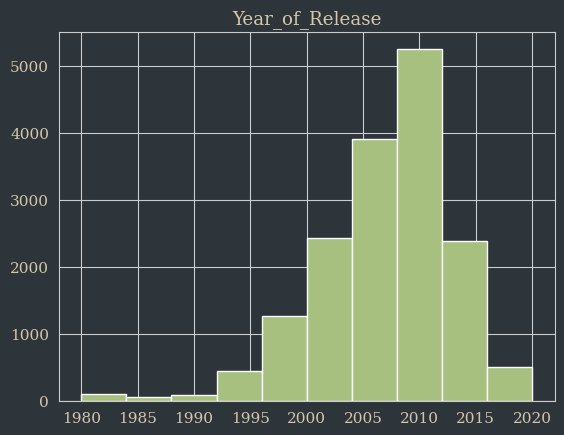

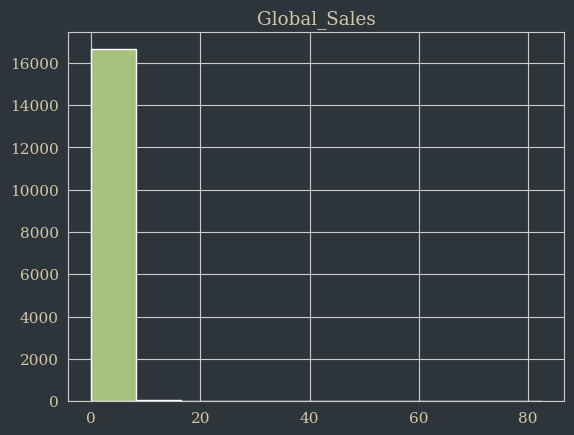

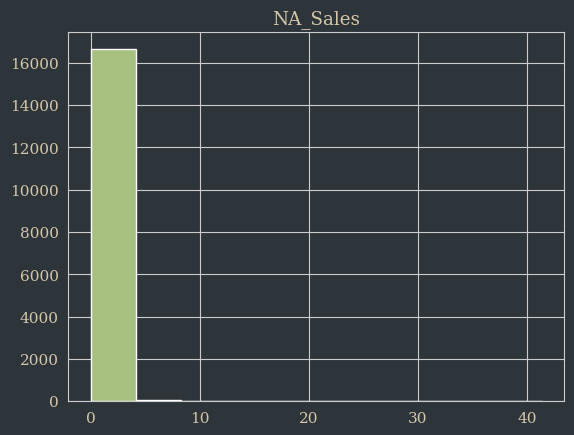

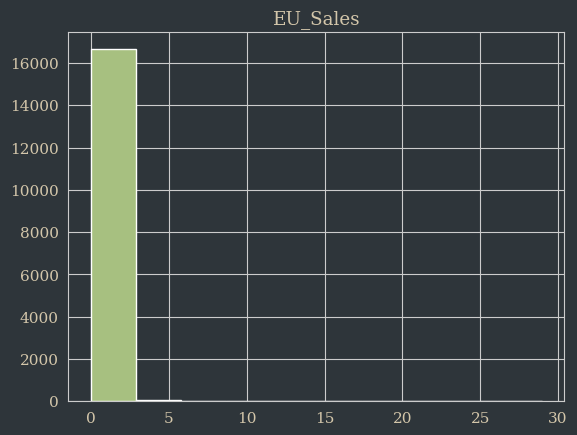

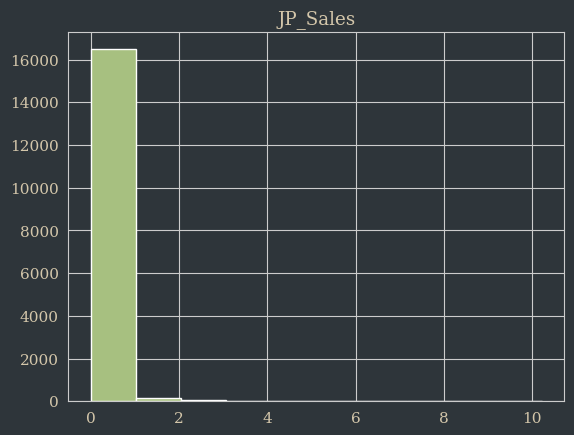

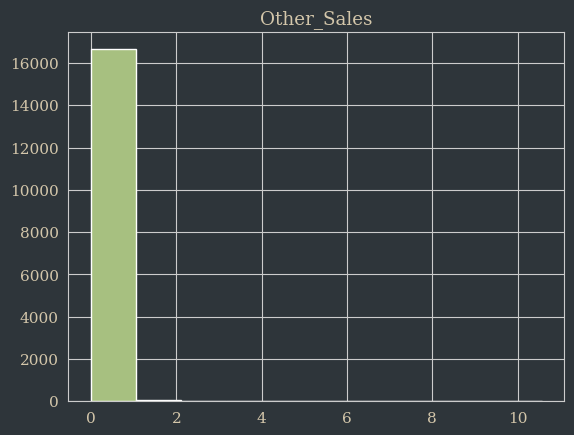

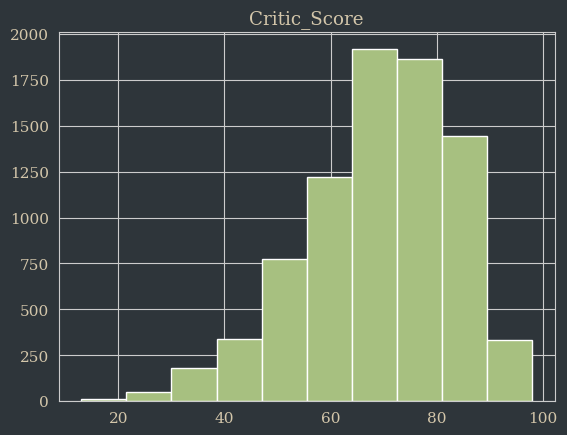

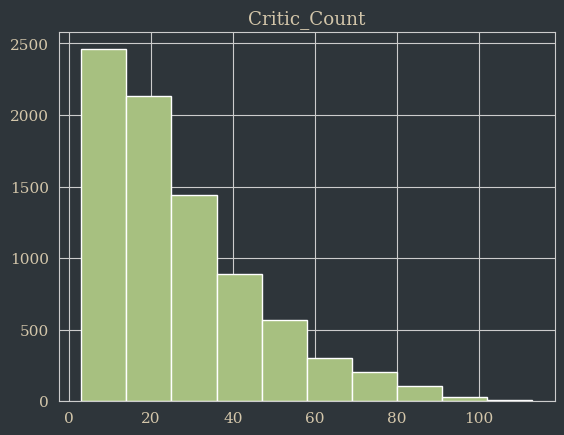

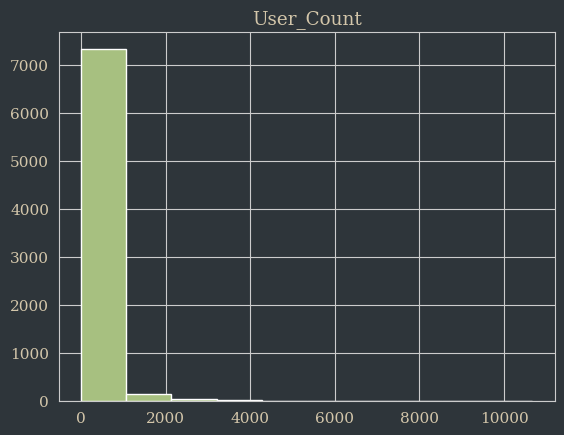

In [12]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

#### User Score Issue

We see that User_Score is giving us an error, which is because it includes the non-numeric value 'tbd.' 

In [13]:
df['User_Score'].value_counts()

User_Score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Rather than waiting for the data cleaning stage to get a look at this variable, I decided to quickly clean it up just to get a look at it:

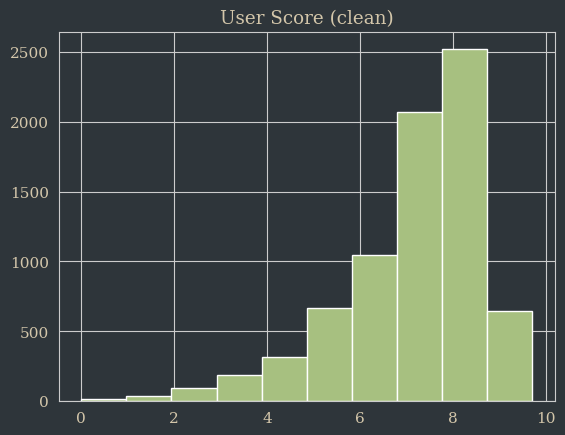

In [14]:
df['user_score_clean'] = pd.to_numeric(df['User_Score'], errors='coerce')

df_num = df[['Year_of_Release', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'user_score_clean', 'User_Count']]

plt.hist(df['user_score_clean'])
plt.title('User Score (clean)')
plt.show()

### Box Plots

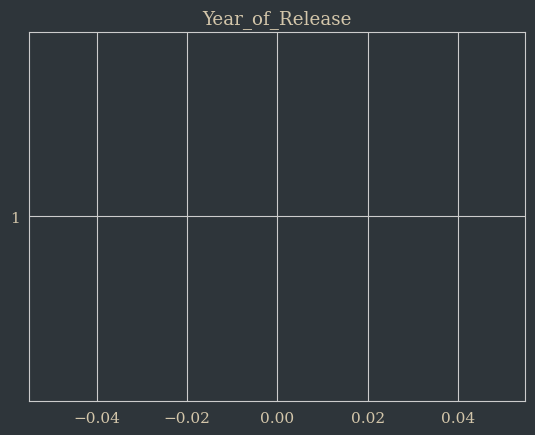

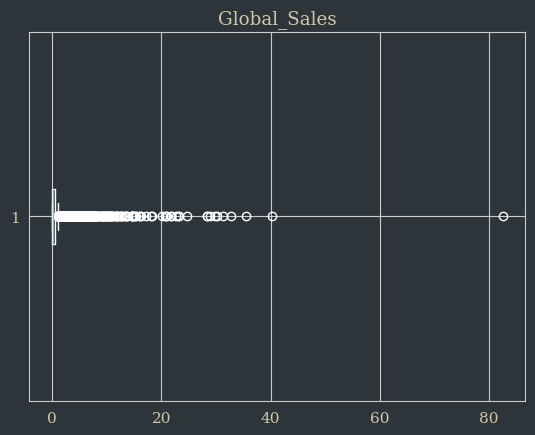

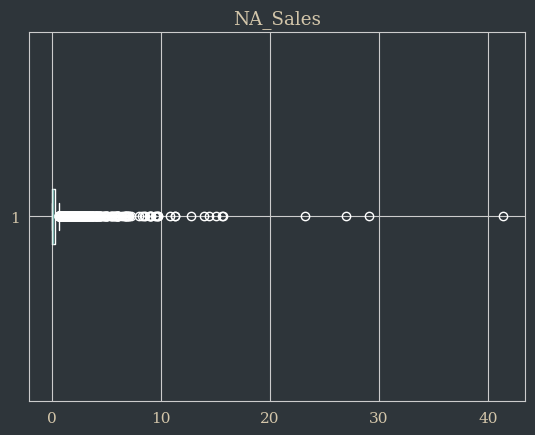

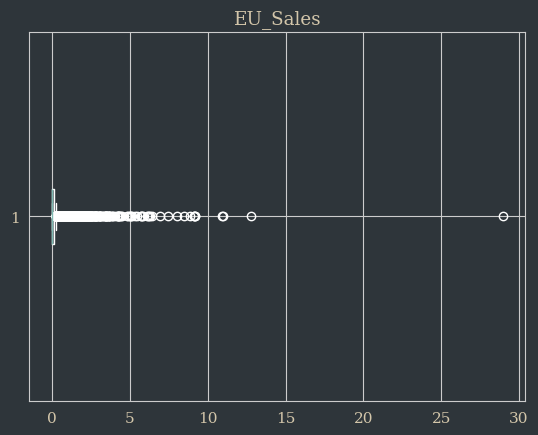

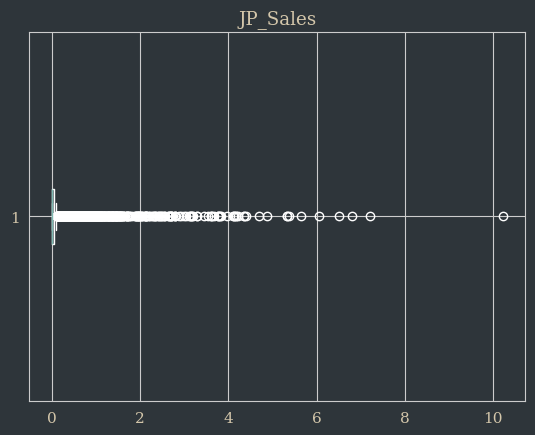

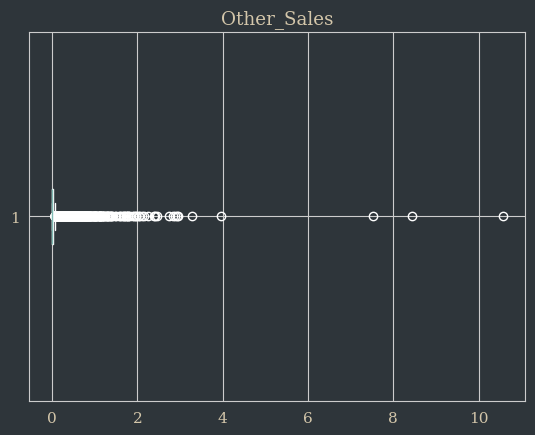

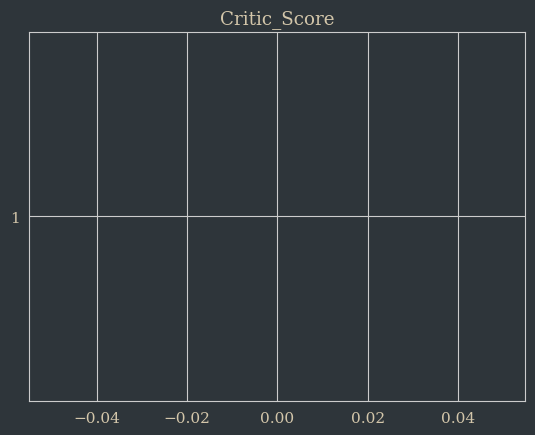

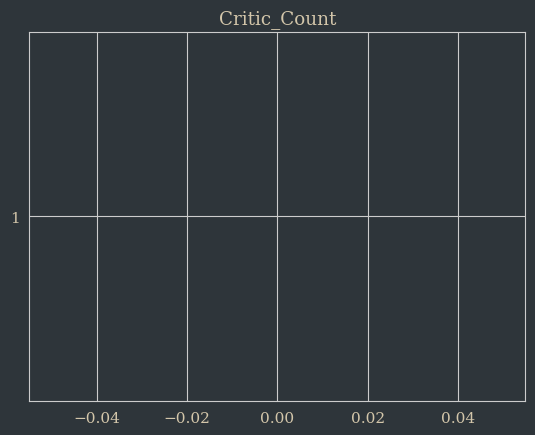

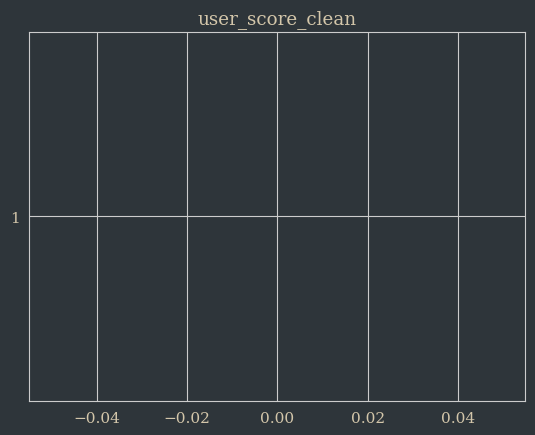

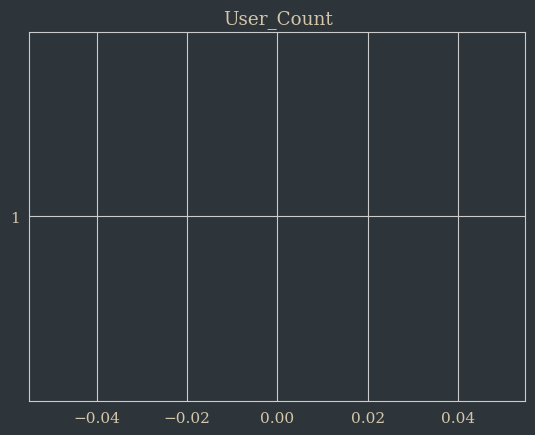

In [15]:
for i in df_num.columns:
    plt.boxplot(df_num[i], vert=False)
    plt.title(i)
    plt.show()

### Bar Plots

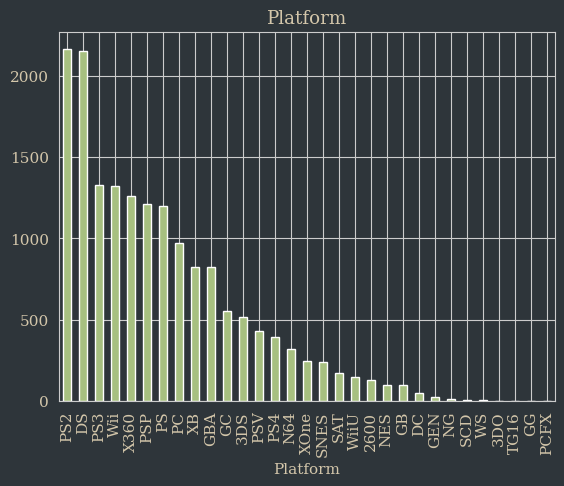

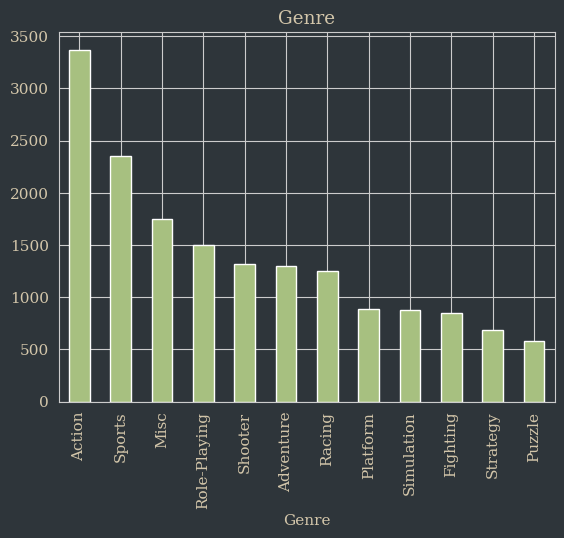

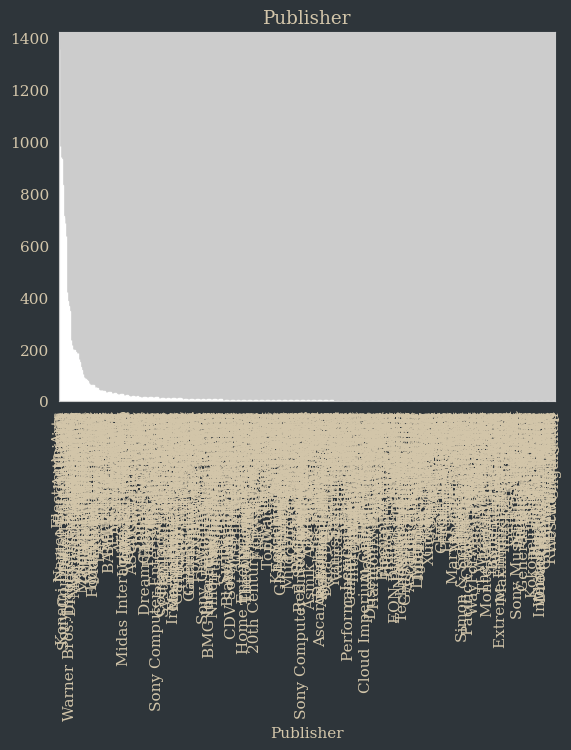

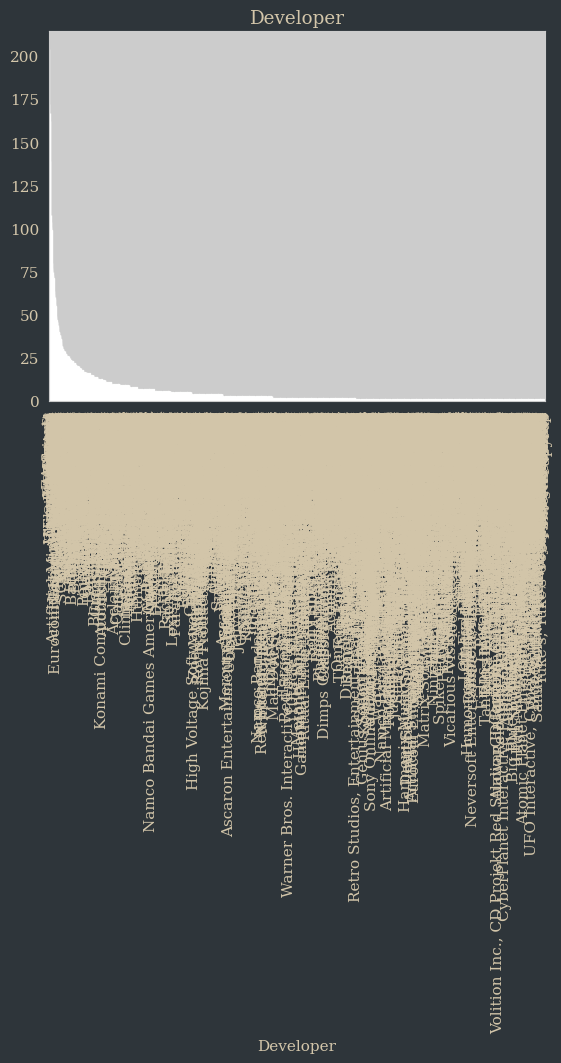

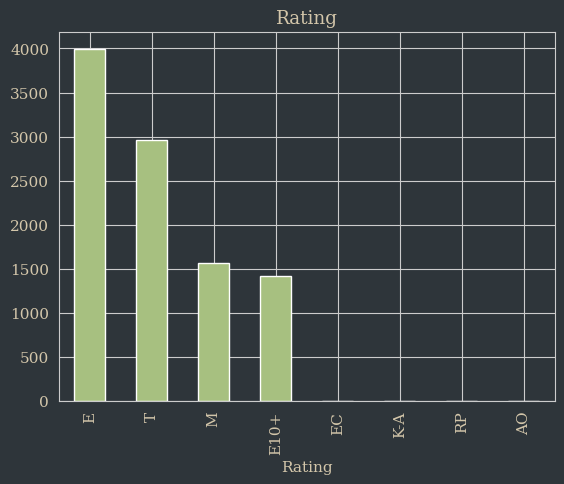

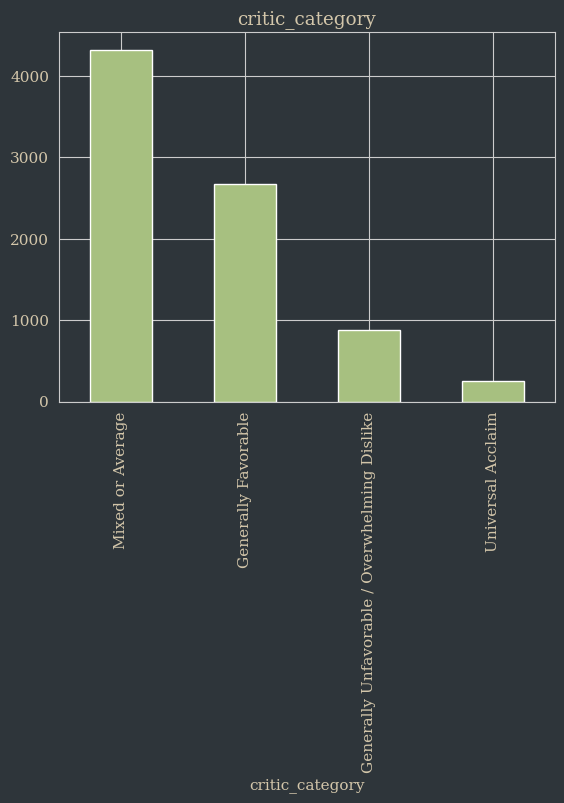

In [16]:
for i in df_cat.columns:
    df_cat[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

### Target Variable (Binned)

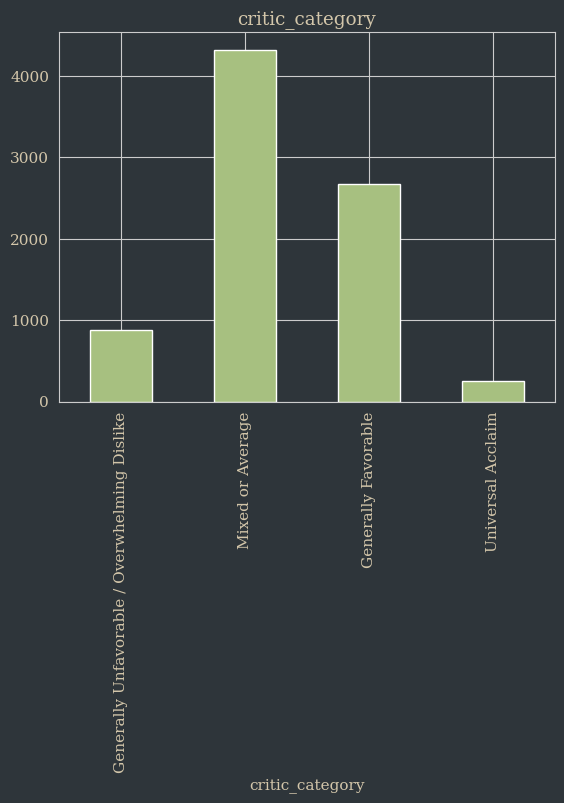

In [17]:
critic_category_order = ['Generally Unfavorable / Overwhelming Dislike', 'Mixed or Average', 'Generally Favorable', 'Universal Acclaim']

df['critic_category'].value_counts().reindex(critic_category_order).plot(kind='bar')
plt.title('critic_category')
plt.show()

### Findings

* Critic_Score has a moderate left skew, indicating that very few titles receive very high or low scores. While it would be inaccurate to say that the bins are normally distributed, it is true that the largest bins is "Mixed or Average," followed by "Generally Favorable," which reflects the distribution of the numeric ratings.
* Interestingly, User_Score is also moderately left-skewed.
* Sales figures generally have a right skew, indicating that most games don't sell many copies.
* Likewise, Critic_Count has a heavy right skew, which indicates that most games aren't widely reviewed.

## 2.3 Bivariate Analysis

### Correlation Matrices

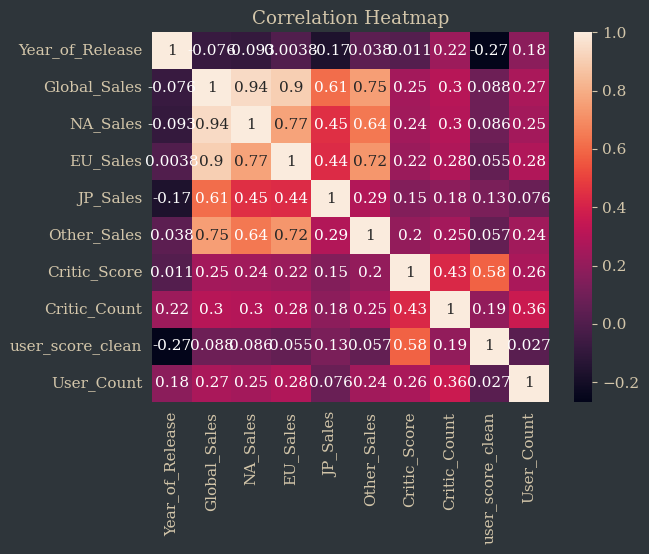

In [18]:
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
correlation_matrix['Critic_Score'].sort_values(ascending=False)

Critic_Score        1.000000
user_score_clean    0.580878
Critic_Count        0.425504
User_Count          0.264376
Global_Sales        0.245471
NA_Sales            0.240755
EU_Sales            0.220752
Other_Sales         0.198554
JP_Sales            0.152593
Year_of_Release     0.011411
Name: Critic_Score, dtype: float64

#### Findings

* Based on the above correlation table, I am immediately suspicious of the relationship between Critic_Count and Critic_Score, as games that receive critical acclaim likely get reviewed more, potentially creating a "leaky variable" effect. From a domain perspective, I don't think this has business value: advising a game publisher to seek out more reviews doesn't seem like intuitively good advice to help them get better reviews, and could even backfire. 

* I'm slightly concerned about the relationship with user_score_clean, based on the idea that a consumer's perception of a game being "critically acclaimed" might lead them to give it a higher review. Aside from that, one might intuit that a game which pleases a critic will also please players because critics have to play the games to review them. This is less worrisome to me than the Critic_Count relationship because I think user_score_clean has a less direct path to "leakiness." From a domain perspective, telling publishers that making a game that players like will improve their reviews seems intuitively sensible.

### Target-Feature Plots

#### Numeric

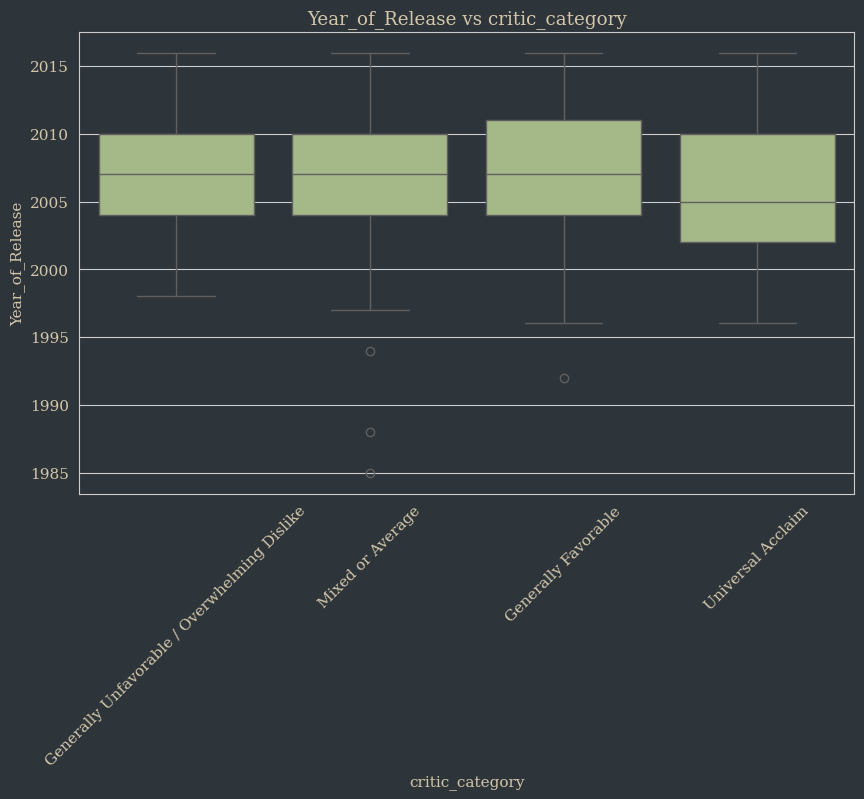

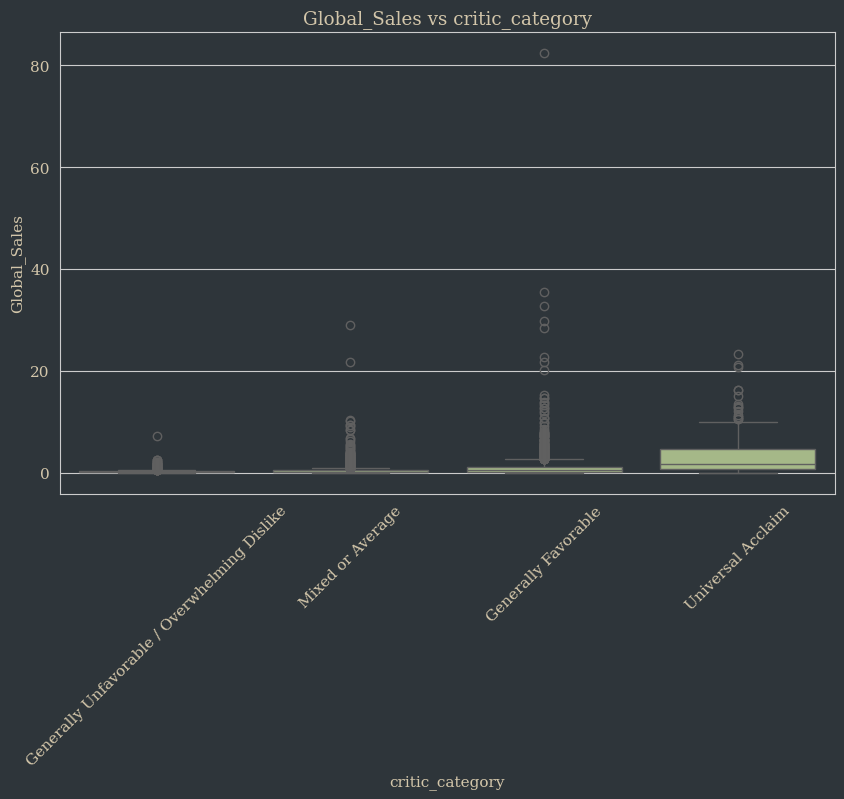

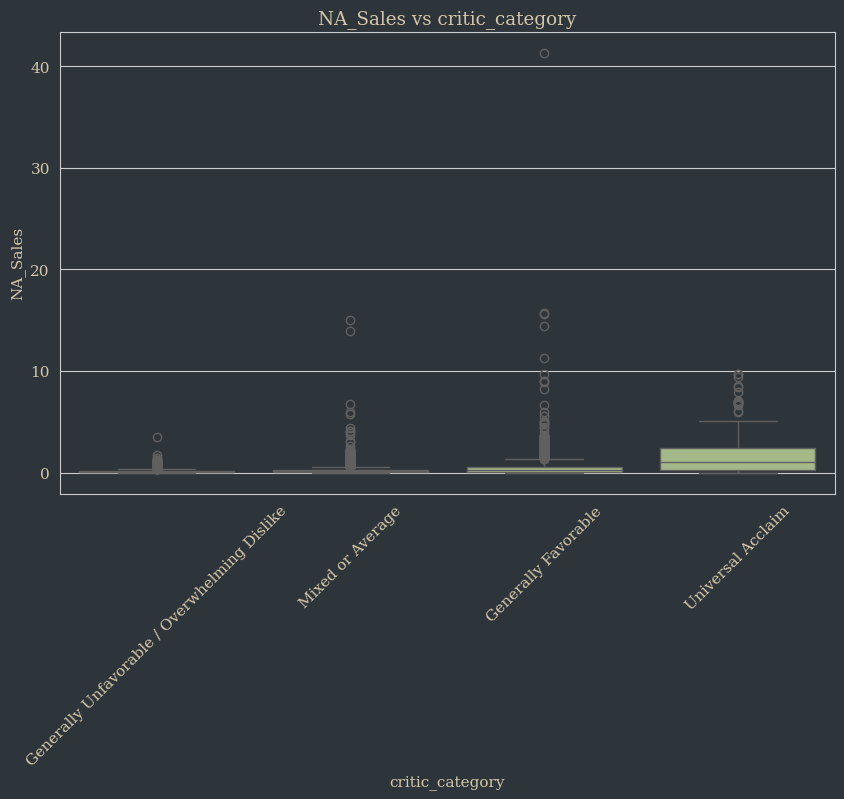

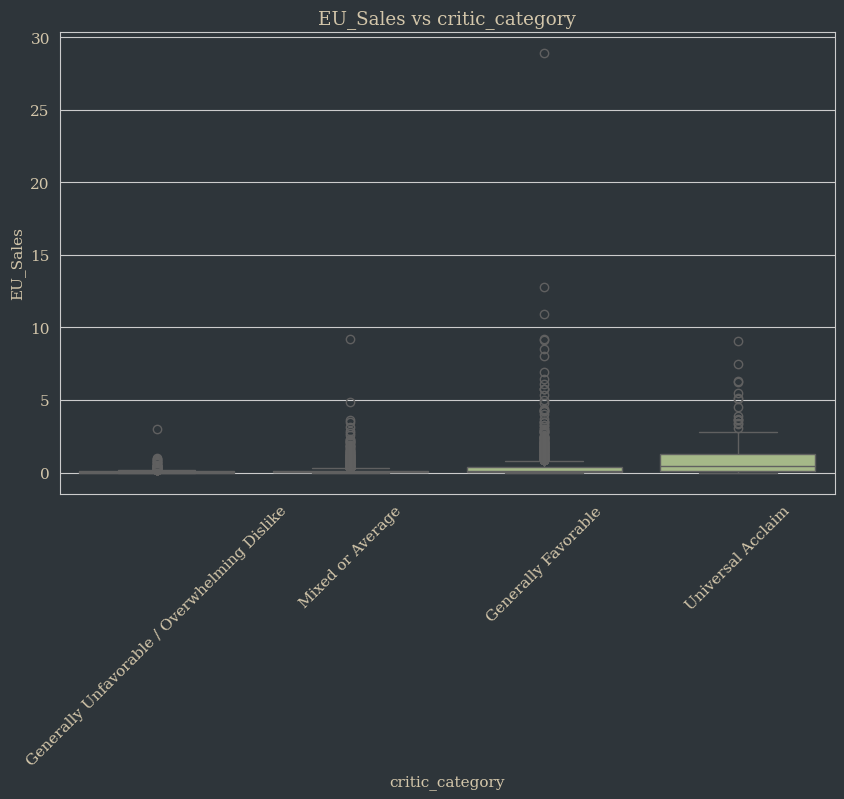

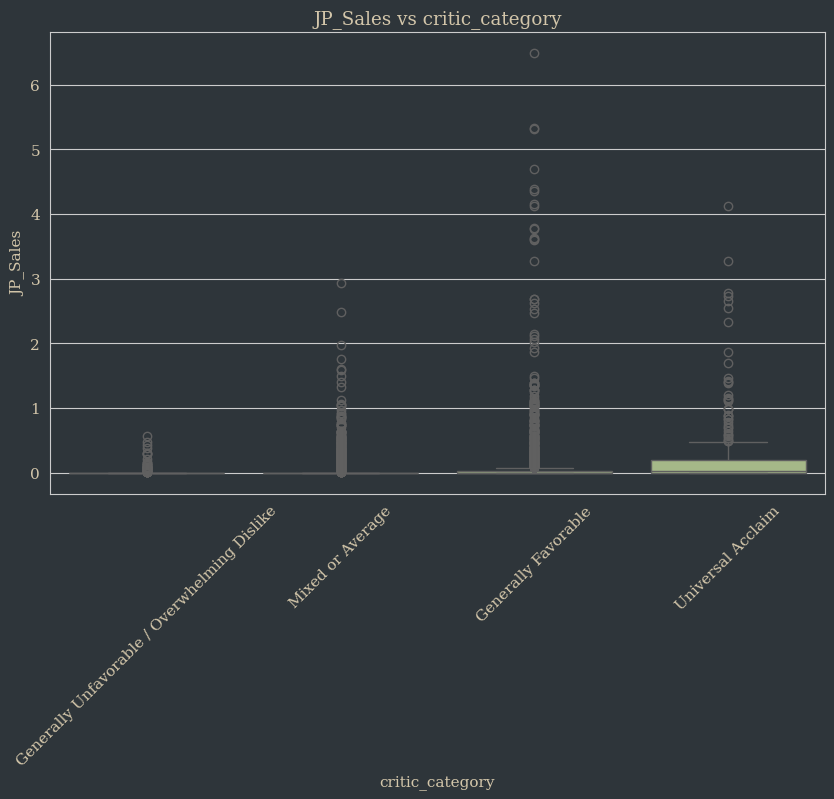

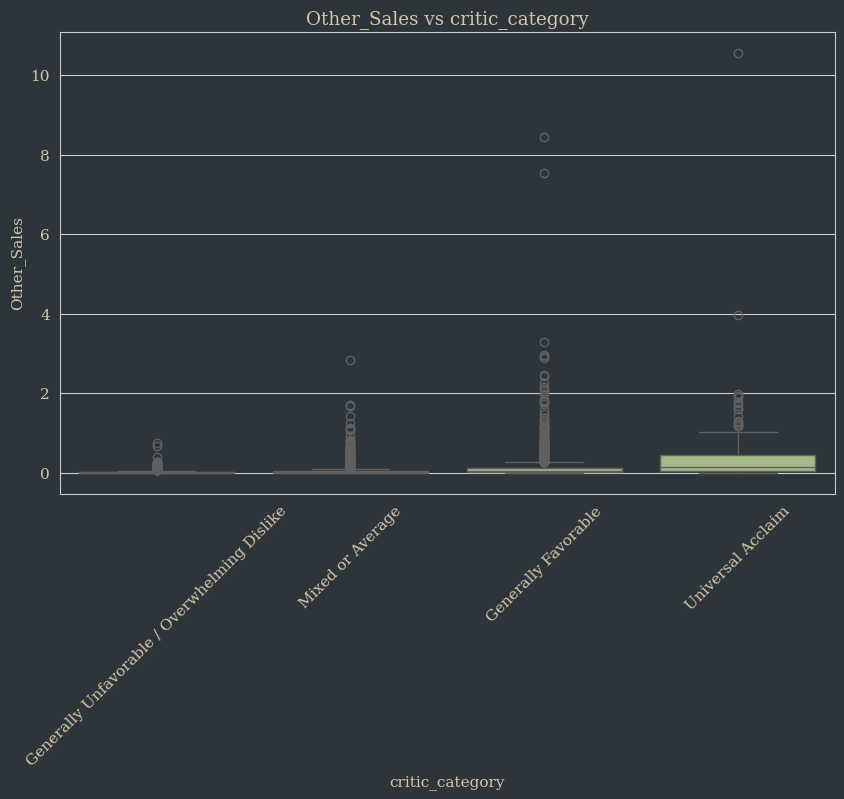

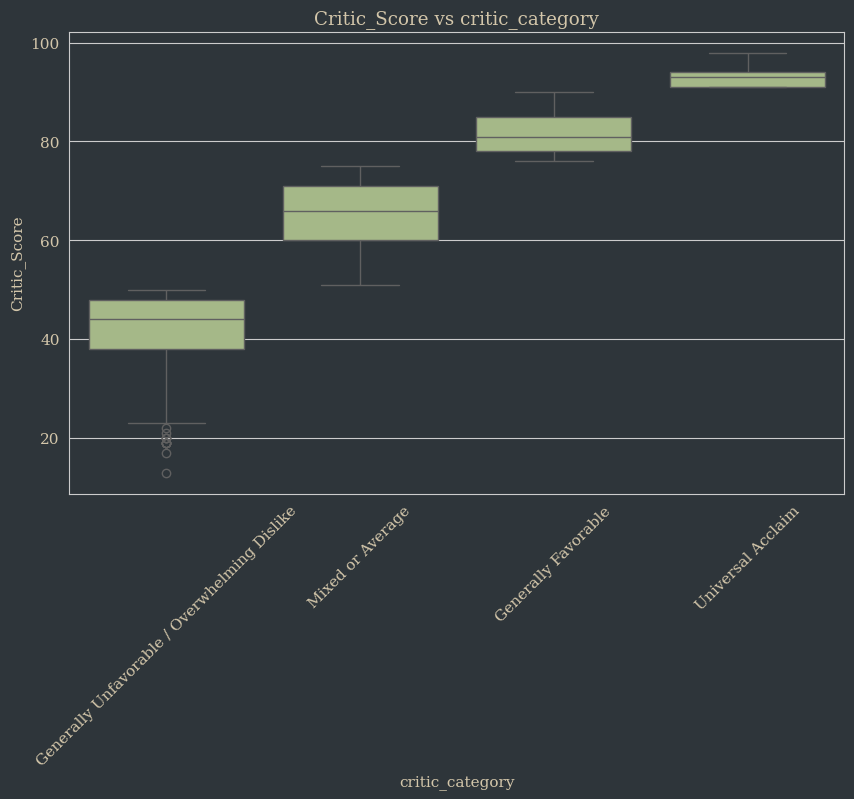

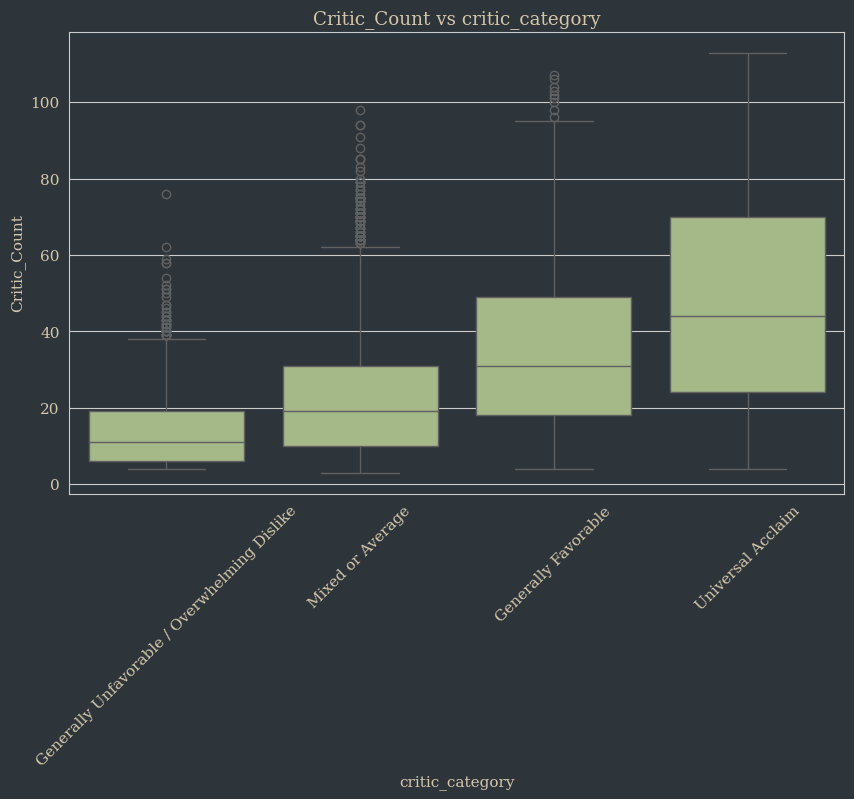

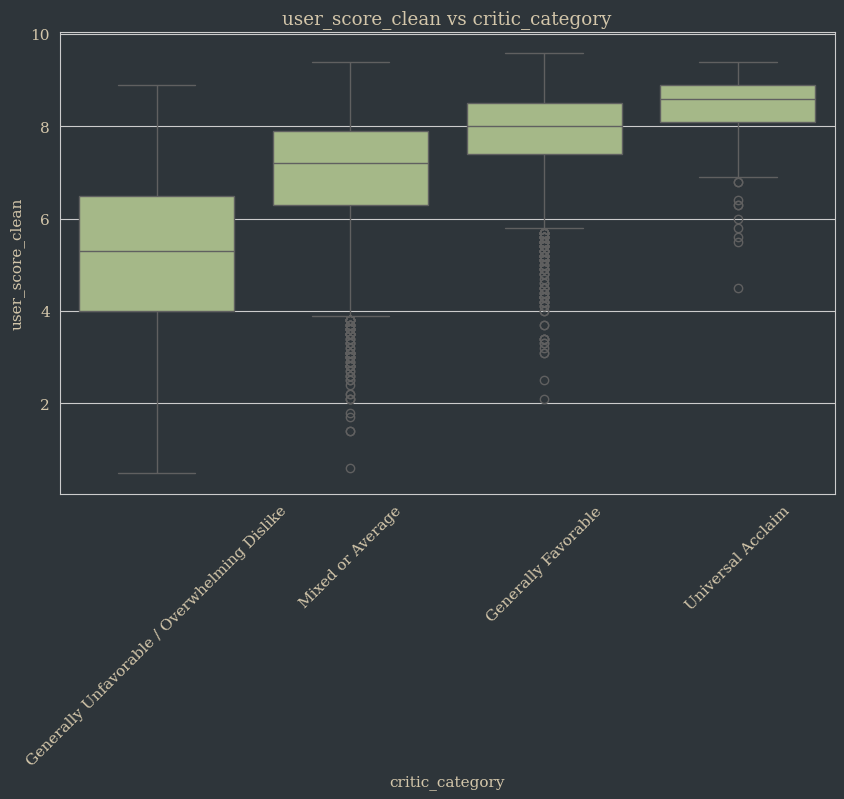

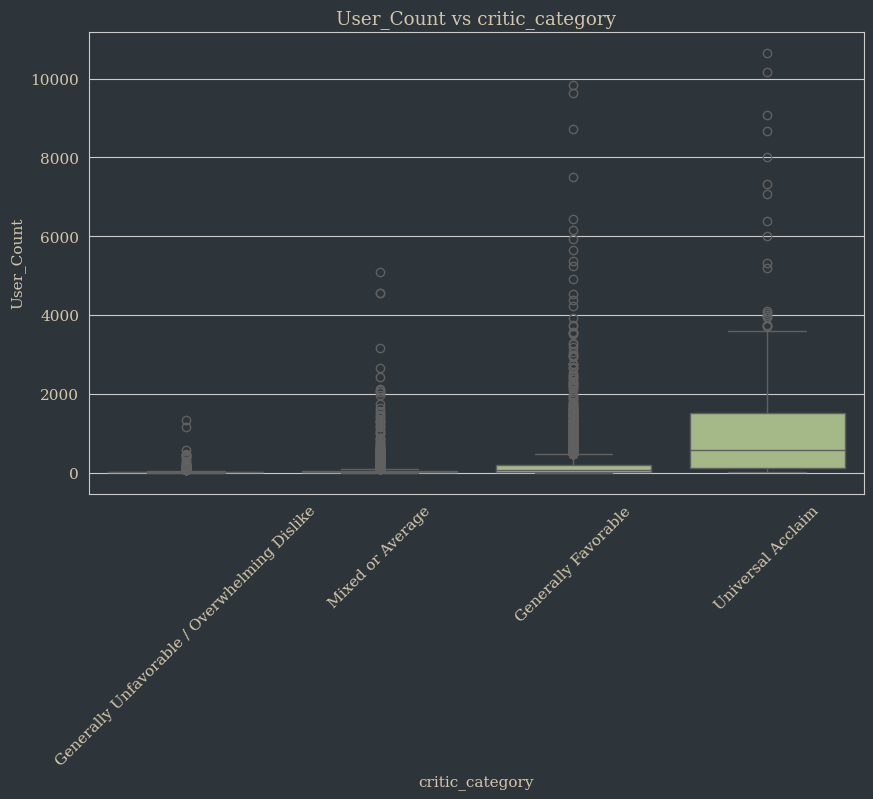

In [20]:
for feature in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='critic_category', y=feature)
    plt.title(f'{feature} vs critic_category')
    plt.xticks(rotation=45)
    plt.show()

#### Categorical

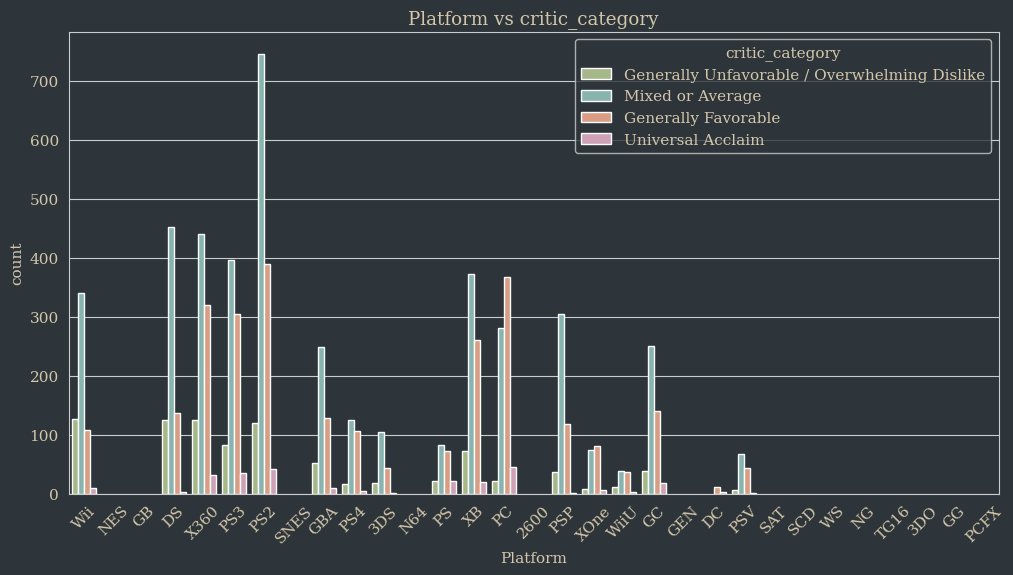

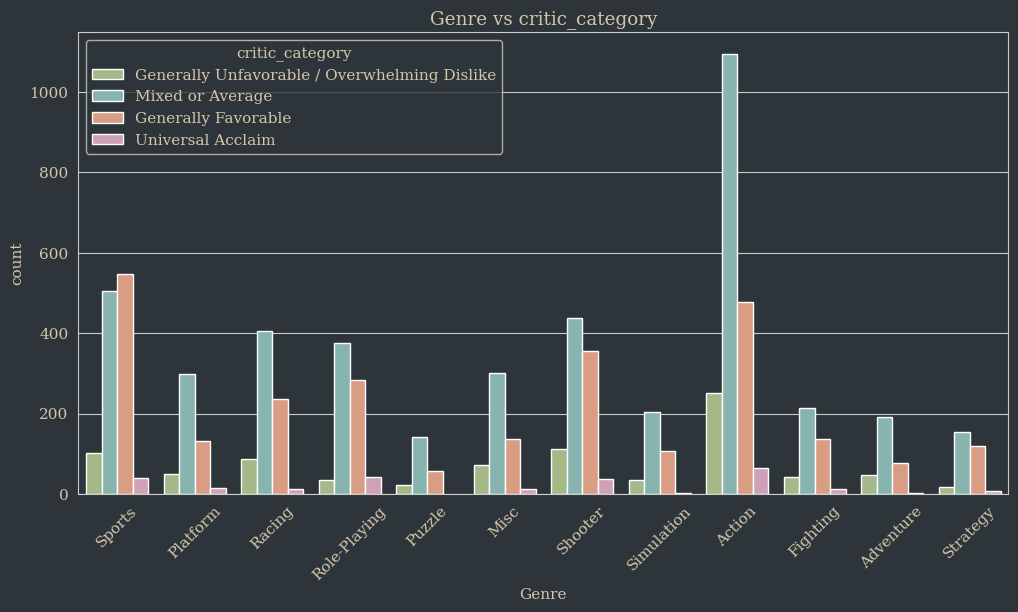

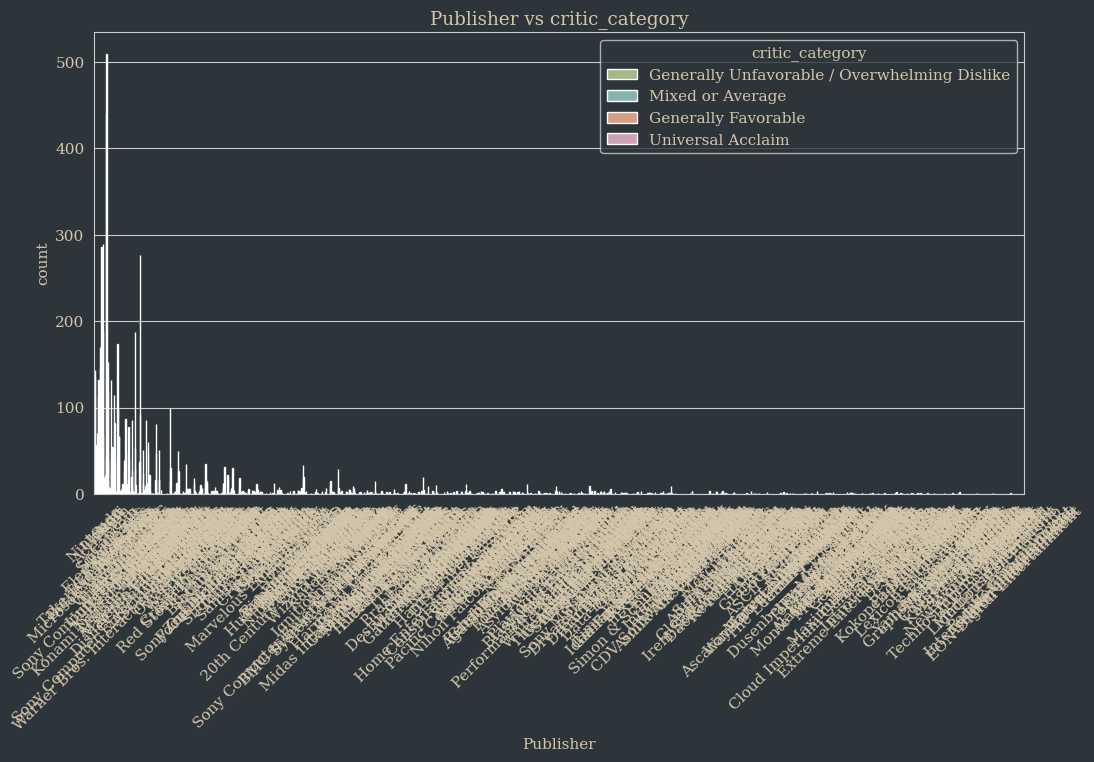

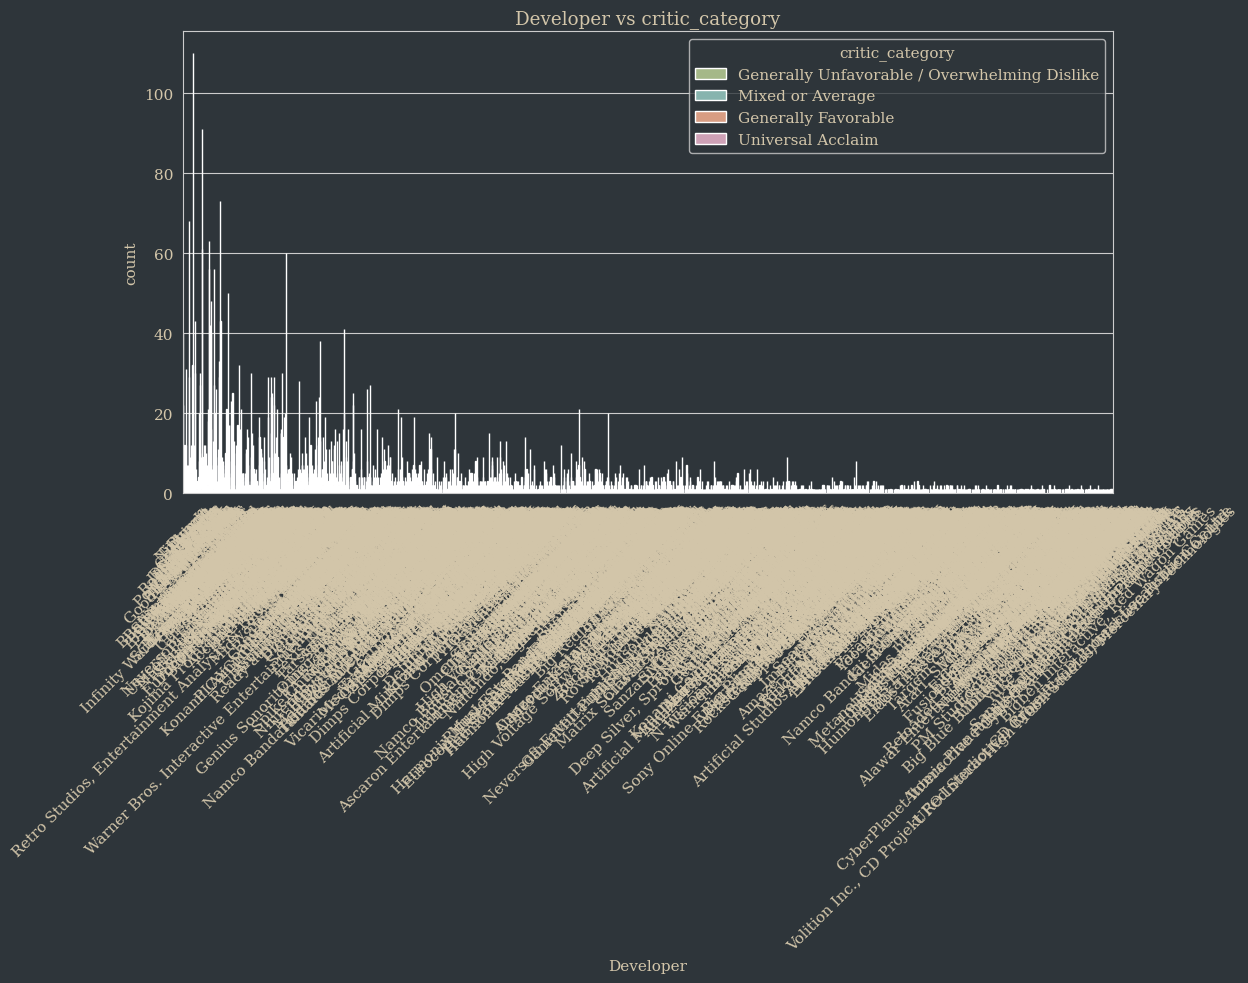

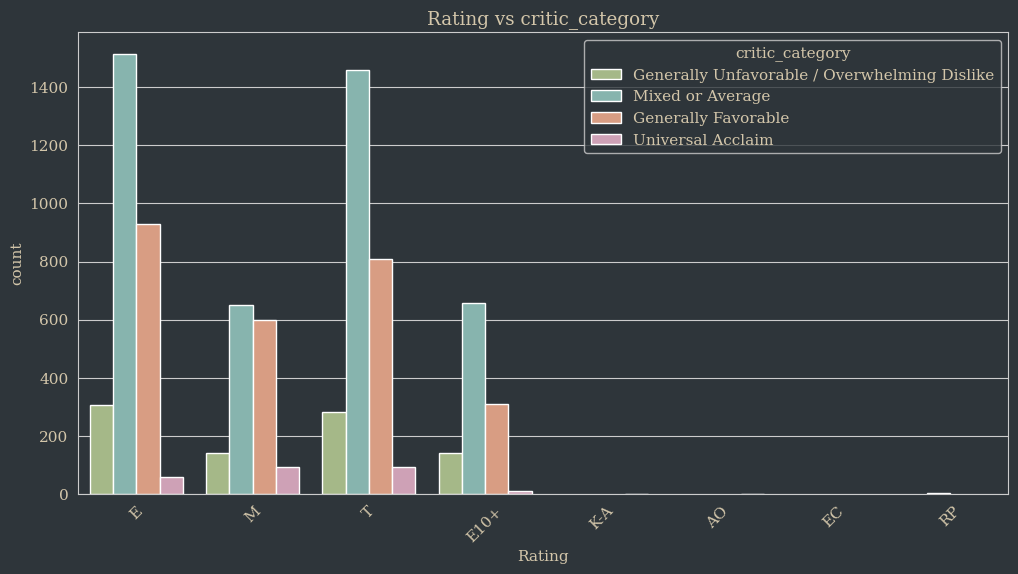

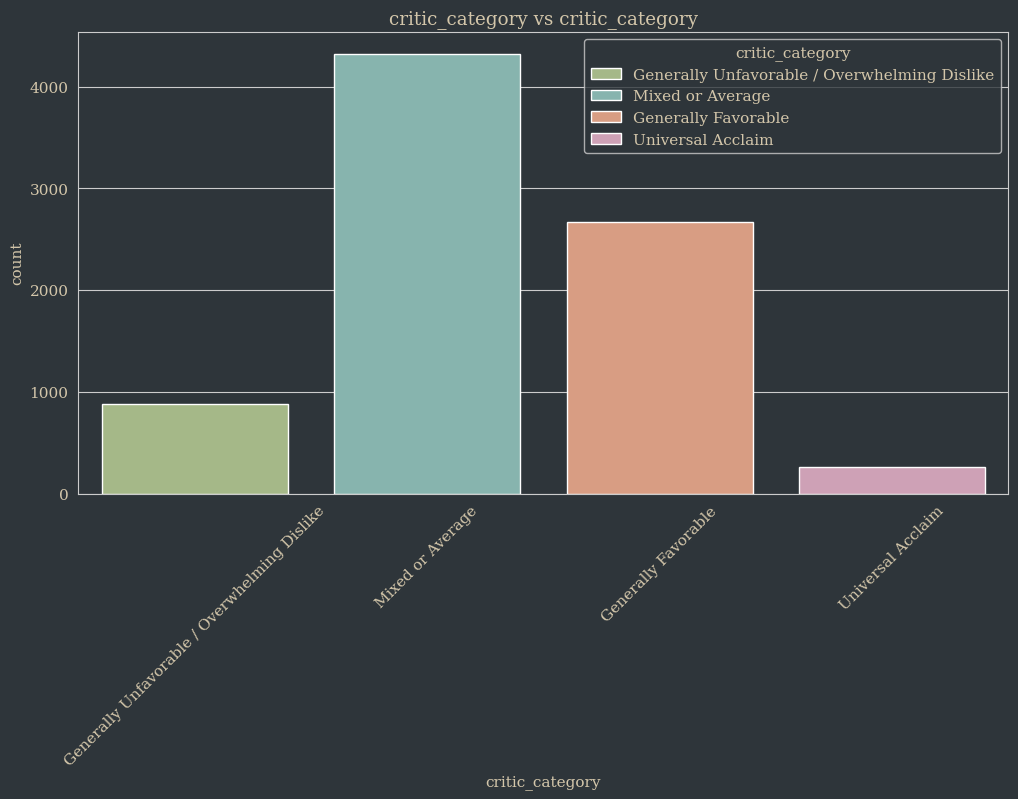

In [21]:
for feature in df_cat.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, hue='critic_category')
    plt.title(f'{feature} vs critic_category')
    plt.xticks(rotation=45)
    plt.show()

#### Findings

* The mean of Year seems to be a bit lower for games receiving "Universal Acclaim," which indicates to me that older games were more likely to receive high scores.
* The relationship between critical_score_category and Genre looks ripe for analysis; Sports games skew towards higher critical ratings, while Platform games seen to trend more towards "mixed or average" reviews.
* As with Genre, the M Rating category seems to track with a higher proportion of Generally Favorable reviews.

## 2.4 Multivariate Analysis

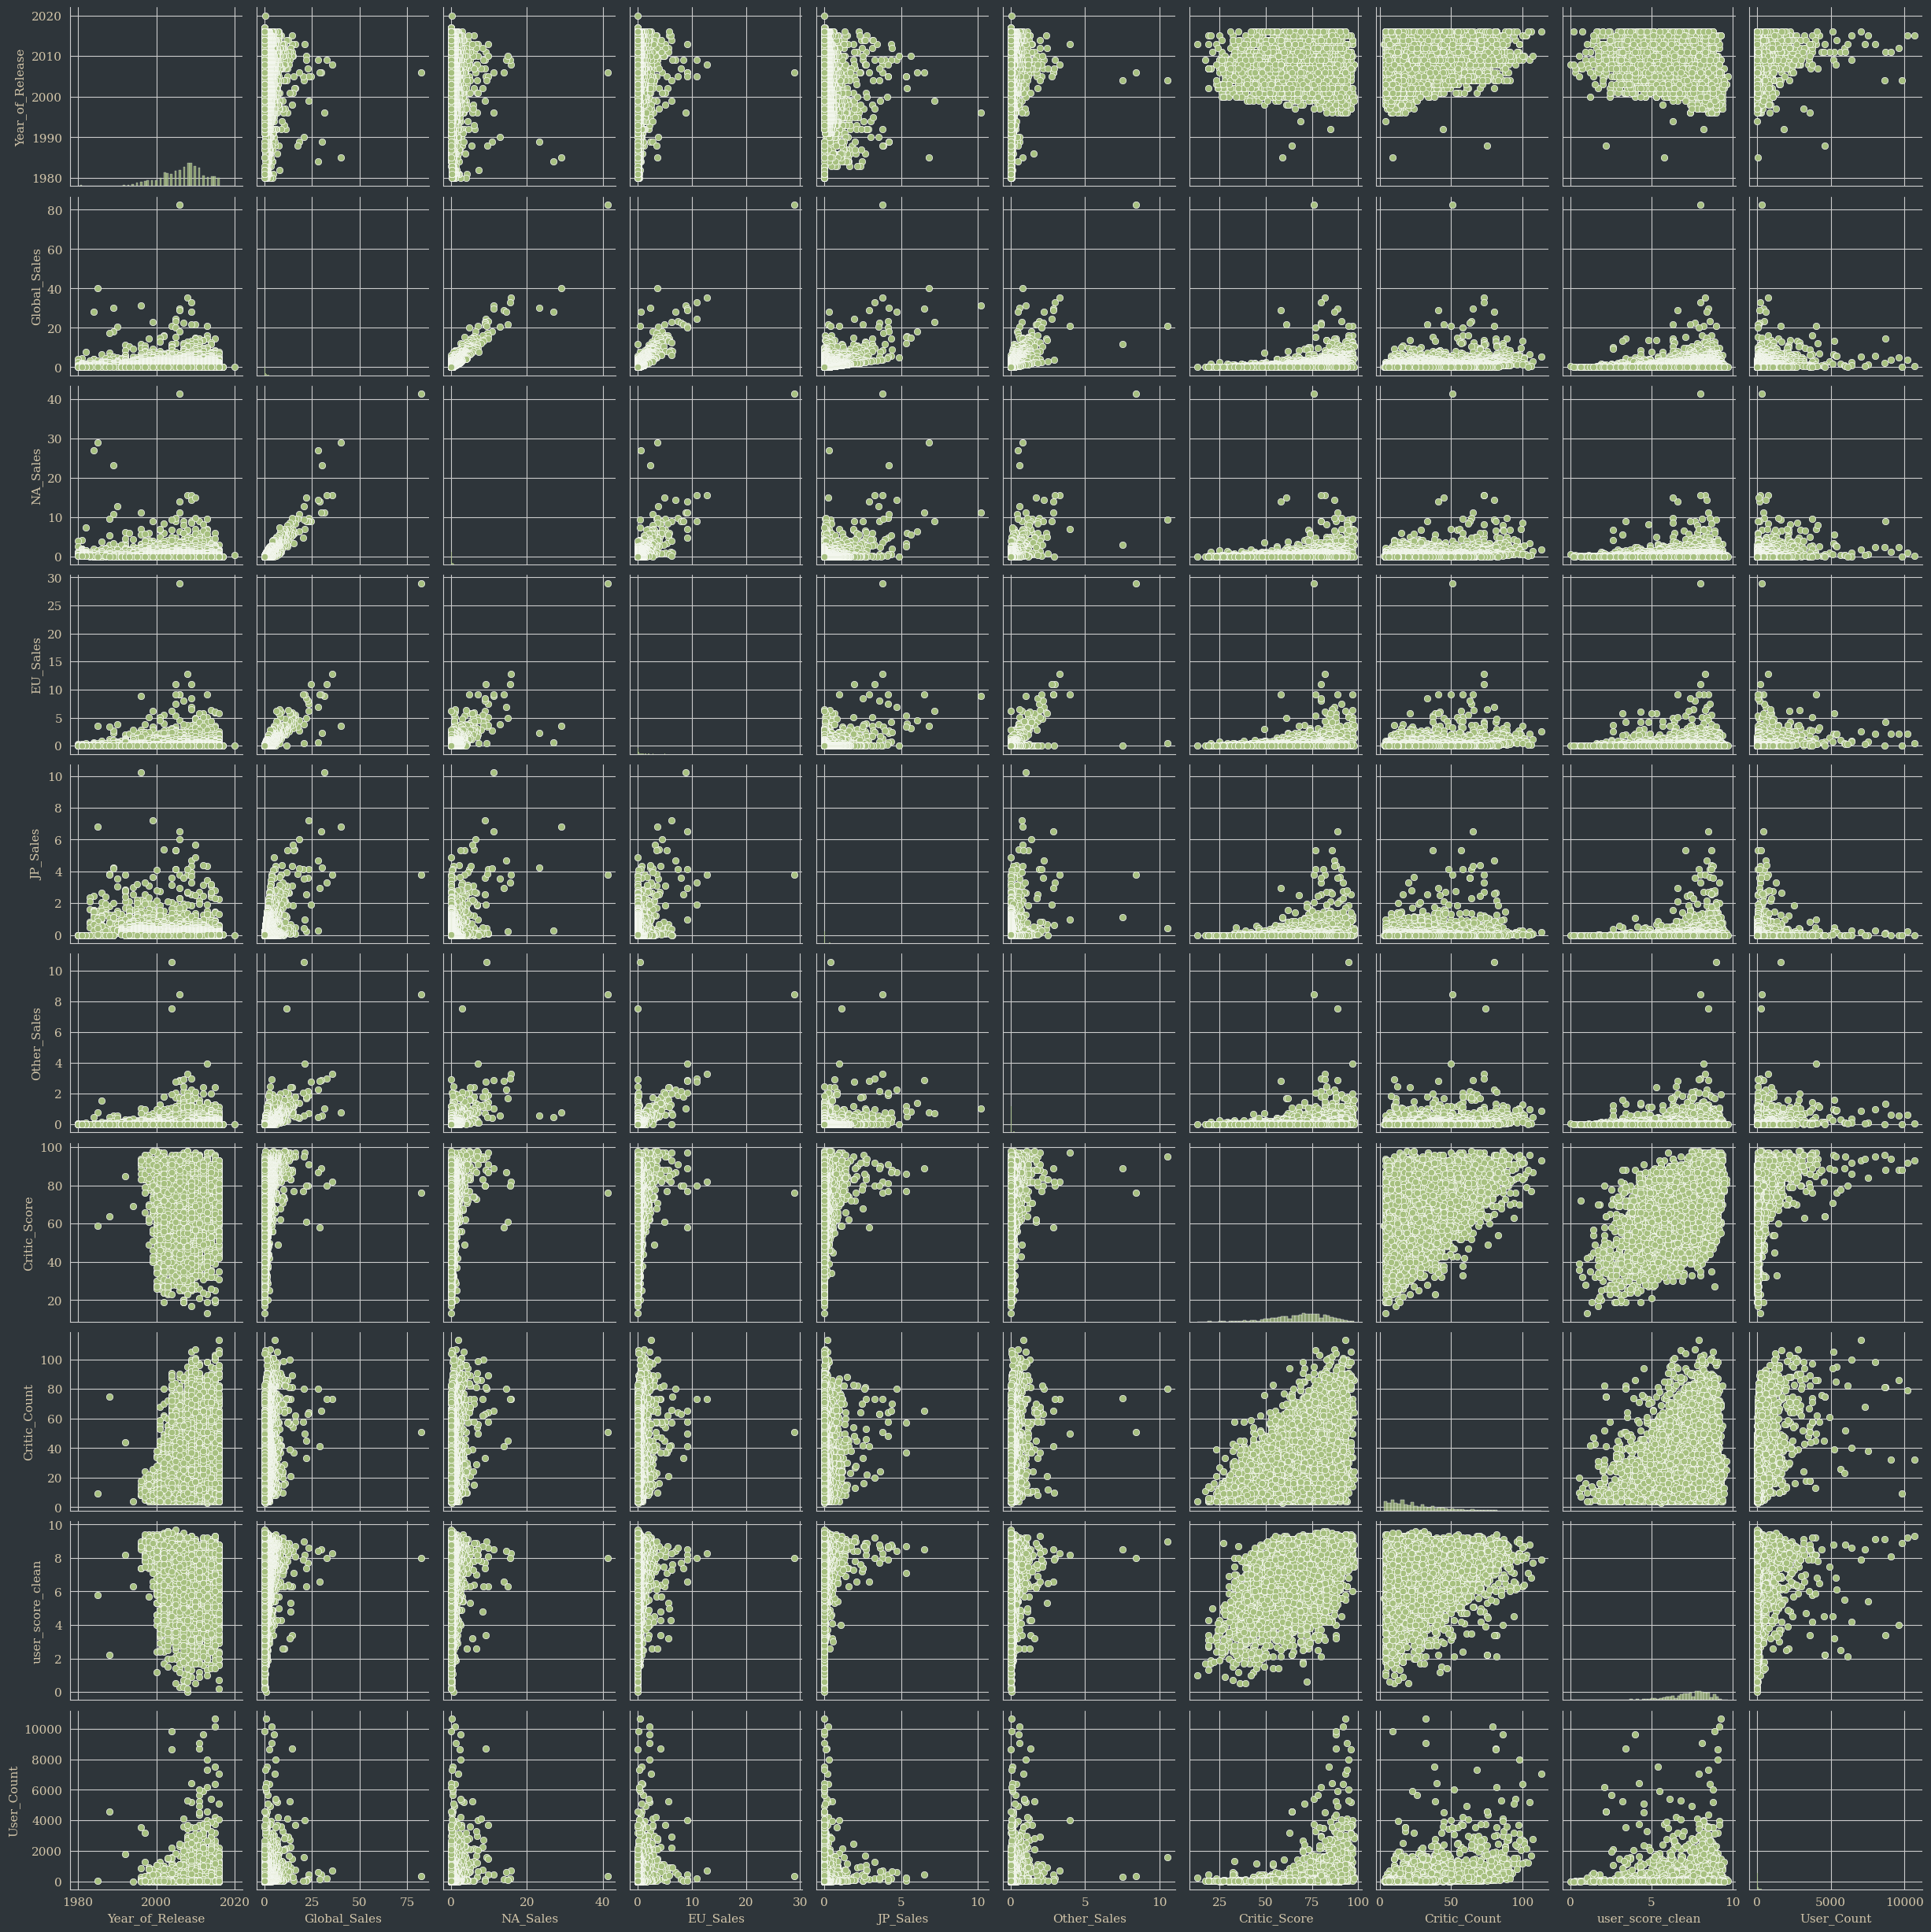

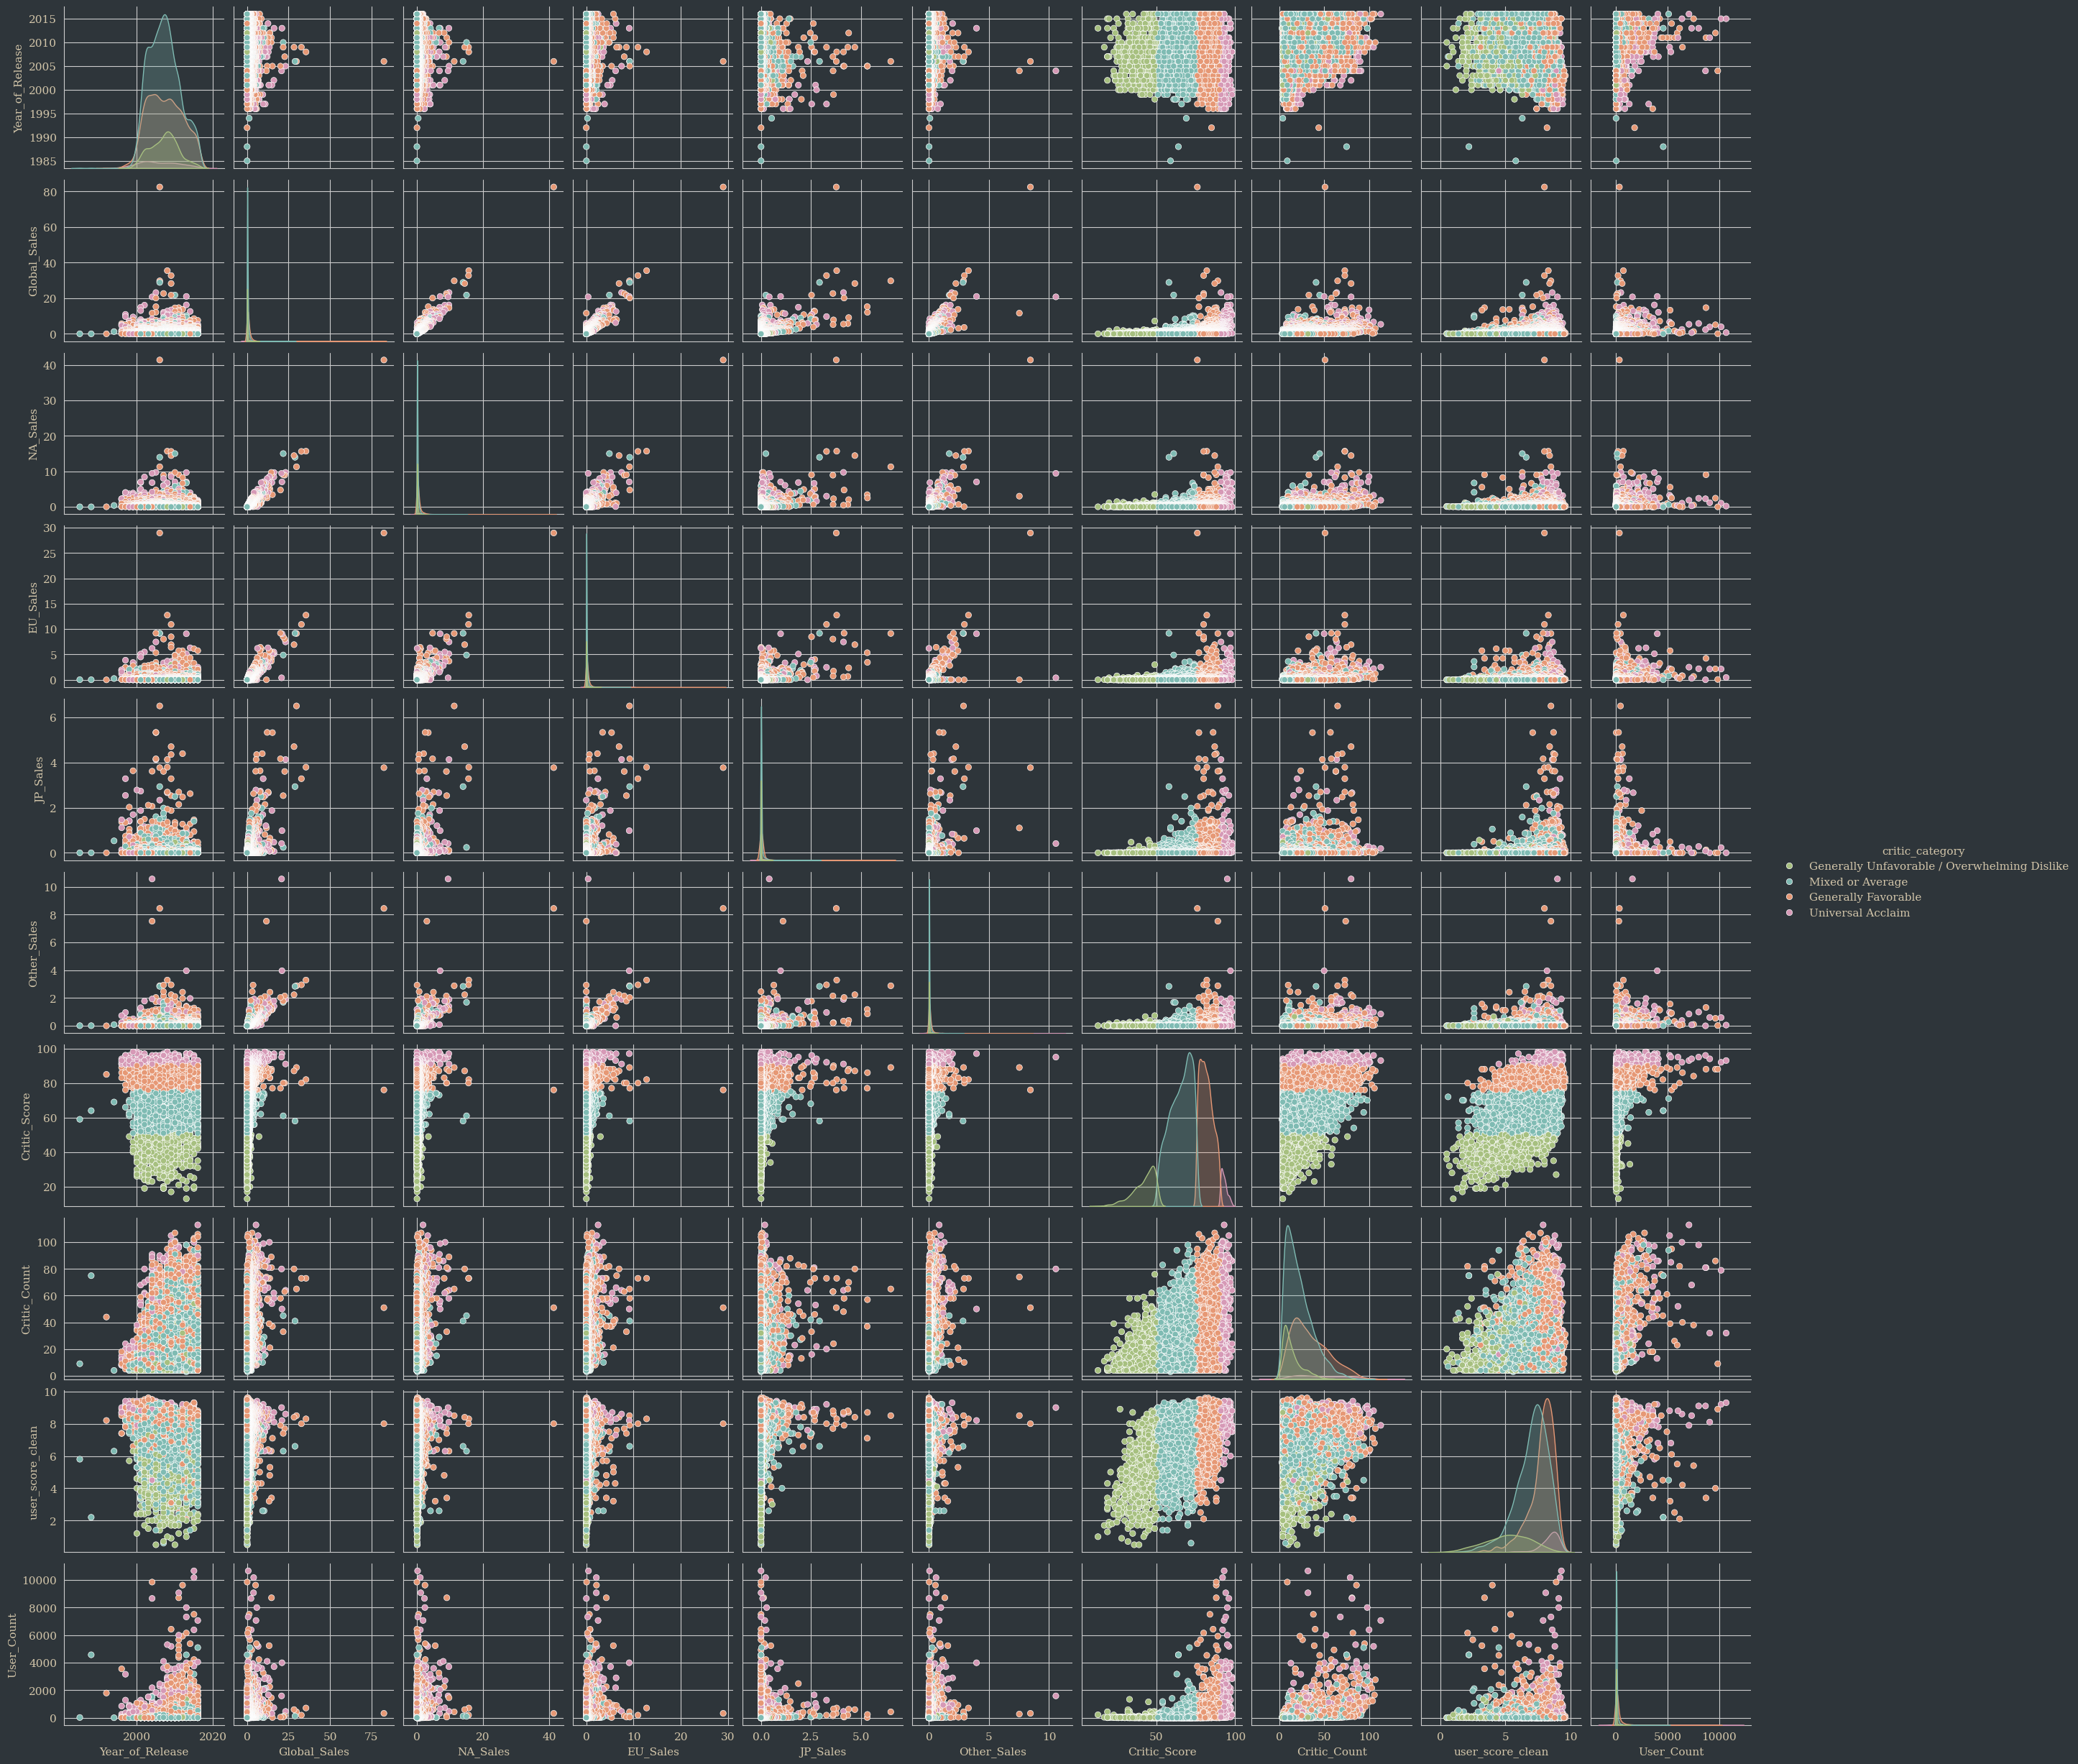

In [22]:
sns.pairplot(df[df_num.columns])
plt.show()

pairplot_cols = list(df_num.columns) + ['critic_category']
sns.pairplot(df[pairplot_cols], hue='critic_category')
plt.show()

## 2.5 EDA Summary

As noted in greater detail above:

* Most games receive "Mixed or Average" or "Generally Favorable" critic scores
* Sales data is heavily right-skewed, indicating that most games don't sell many copies
* Critic_Count is right-skewed, showing that most games don't receive many reviews
* Critic_Count is likely a leaky variable
* User and critic scores moderately correlated (0.58)
* Older games more likely to receive "Universal Acclaim" score
* Genre and Rating are potentially useful categorical predictors

# Part 3: Data Cleaning and Preprocessing

## 3.1 Missing Values

As seen in the Data Overview above, a significant number of observations lack values for key variables, including our target variable!

In [23]:
missing_summary

Missing_Count  Missing_Percentage
Name                         2            0.011962
Platform                     0            0.000000
Year_of_Release            269            1.608948
Genre                        2            0.011962
Publisher                   54            0.322986
NA_Sales                     0            0.000000
EU_Sales                     0            0.000000
JP_Sales                     0            0.000000
Other_Sales                  0            0.000000
Global_Sales                 0            0.000000
Critic_Score              8582           51.330821
Critic_Count              8582           51.330821
User_Score                6704           40.098092
User_Count                9129           54.602548
Developer                 6623           39.613613
Rating                    6769           40.486871

### Missing Values to Drop

1. **critic_score_category** is our target variable, so we can't properly conduct analysis without it. I will drop all records for which this value is null. This will also drops null values for the **Critic_Score** feature (from which our binned target was derived) and **critic_count**, which I also regard as being redundant with the target variable.
2. Because of overlap and redudancy among these features, I will drop the original Critic_Score and Critic_Count columns from the model entirely.
3. **User_Score** and **user_score_clean** are potentially-valuable indicators of game quality, but null or TBD values in these features make up more than 50% of our dataset, which would be too much synthetic data to impute, so these features will be dropped as well.
4. There are a small number of missing records for **Name** and **Genre** so little is lost by dropping the null observations for these features.
5. There are a moderate number of missing records for **Year_of_Release**. I can't put my finger on it but something feels wrong about imputing year values, so I'm dropping these.

In [24]:
df_cleaned = df.copy()

# drop rows with null values
df_cleaned = df_cleaned.dropna(subset=['critic_category'])
df_cleaned = df_cleaned.dropna(subset=['Name', 'Genre']) 
df_cleaned = df_cleaned.dropna(subset=['Year_of_Release'])

# drop unwanted columns
columns_to_drop = ['User_Score', 'Critic_Score', 'Critic_Count', 'user_score_clean', 'User_Count']
existing_columns = [col for col in columns_to_drop if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(existing_columns, axis=1)

# check cleaned dataframe
df_cleaned.shape

(7983, 13)

### Missing Values to Impute

1. **Rating** is an interesting case because ESRB ratings weren't implemented until 1994, so there is likely a time-based component to this missingness.
2. **Publisher** and **Developer** are strictly categorical features with a multitude of possible labels.

For these three features, I chose to implement an "Unknown" category to preserve potential meaningfulness within

In [25]:
df_cleaned = df_cleaned.fillna({'Rating': 'Unknown', 'Publisher': 'Unknown', 'Developer': 'Unknown'})

### Missing Value Check

In [26]:
df_cleaned.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Developer          0
Rating             0
critic_category    0
dtype: int64

## 3.2 Feature Engineering

### Feature Check

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7983 entries, 0 to 16709
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             7983 non-null   object  
 1   Platform         7983 non-null   object  
 2   Year_of_Release  7983 non-null   float64 
 3   Genre            7983 non-null   object  
 4   Publisher        7983 non-null   object  
 5   NA_Sales         7983 non-null   float64 
 6   EU_Sales         7983 non-null   float64 
 7   JP_Sales         7983 non-null   float64 
 8   Other_Sales      7983 non-null   float64 
 9   Global_Sales     7983 non-null   float64 
 10  Developer        7983 non-null   object  
 11  Rating           7983 non-null   object  
 12  critic_category  7983 non-null   category
dtypes: category(1), float64(6), object(6)
memory usage: 818.8+ KB


### Categorical Features

#### High Cardinality Features

I note that Publisher and Developer have far too many unique values to make one-hot encoding practical: even though I believe in the power of my PC and its abundance of RAM, from a statistical perspective we encounter the "curse of dimensionality." 

In [28]:
print(df_cleaned['Platform'].nunique())
print(df_cleaned['Genre'].nunique()) 
print(df_cleaned['Publisher'].nunique())
print(df_cleaned['Developer'].nunique())
print(df_cleaned['Rating'].nunique())

17
12
302
1453
8


For features with such high cardinality, I chose to only use the top 15 values and lump the remaining into an "Other" category.

In [29]:
top_publishers = df_cleaned['Publisher'].value_counts().head(15).index
df_cleaned['Publisher'] = df_cleaned['Publisher'].apply(lambda x: x if x in top_publishers else 'Other')
top_developers = df_cleaned['Developer'].value_counts().head(15).index
df_cleaned['Developer'] = df_cleaned['Developer'].apply(lambda x: x if x in top_developers else 'Other')
print(df_cleaned['Platform'].nunique())
print(df_cleaned['Genre'].nunique()) 
print(df_cleaned['Publisher'].nunique())
print(df_cleaned['Developer'].nunique())
print(df_cleaned['Rating'].nunique())

17
12
16
16
8


#### One-Hot Encoding

Now that the high-cardinality features have been transformed, I feel confident one-hot encoding the categorical variables.

In [30]:
df_cat_to_encode = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
df_encoded = pd.get_dummies(df_cleaned, columns=df_cat_to_encode, drop_first=True)
print(df_cleaned.shape)
print(df_encoded.shape)

(7983, 13)
(7983, 72)


## 3.3 Feature Scaling

Because the sales variables and Year_of_Release are on much larger scales than the one-hot encoded categorical features, I standardized all features using StandardScaler to prevent one of these larger feature types from dominating the PCA and LDA analysis. Note that the Name variable isn't needed for PCA or LDA, so it is dropped from our X.

In [31]:
X = df_encoded.drop(['Name', 'critic_category'], axis=1)
y = df_encoded['critic_category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3.4 Train-Test Split

Having cleaned, encoded, and scaled the data, I set up an 80/20 train-test split.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10, stratify=y)

# Part 4: Visualization Requirements

## 4.1 Univariate Plots

### Numeric Variables

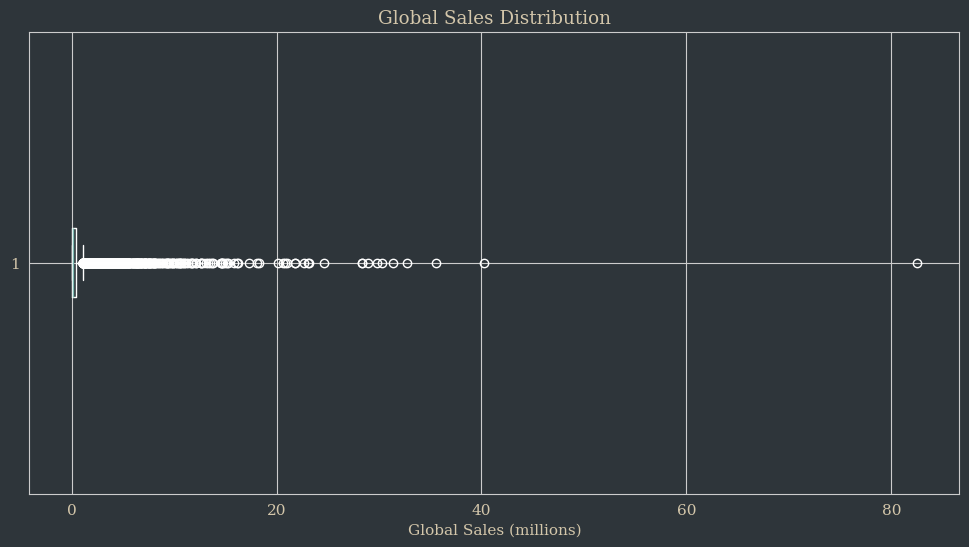

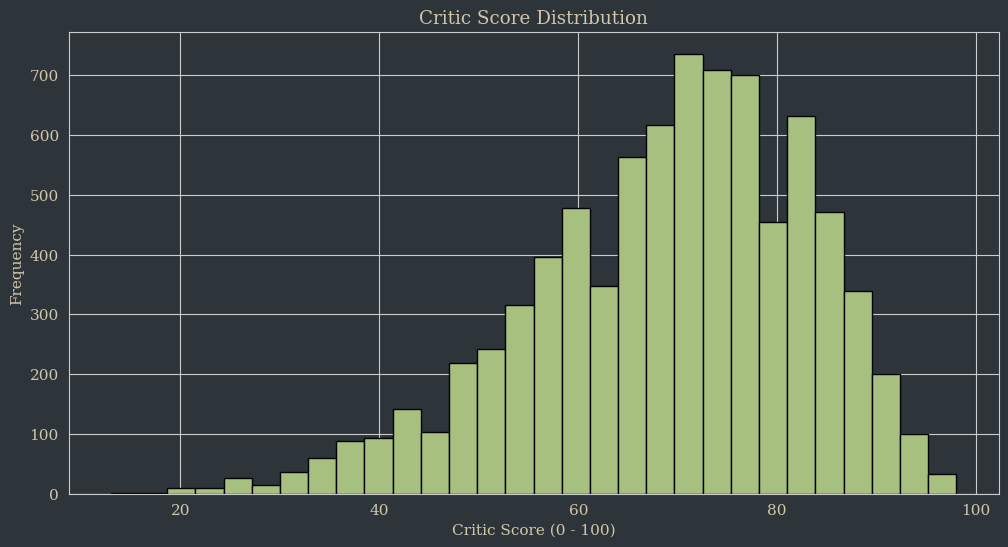

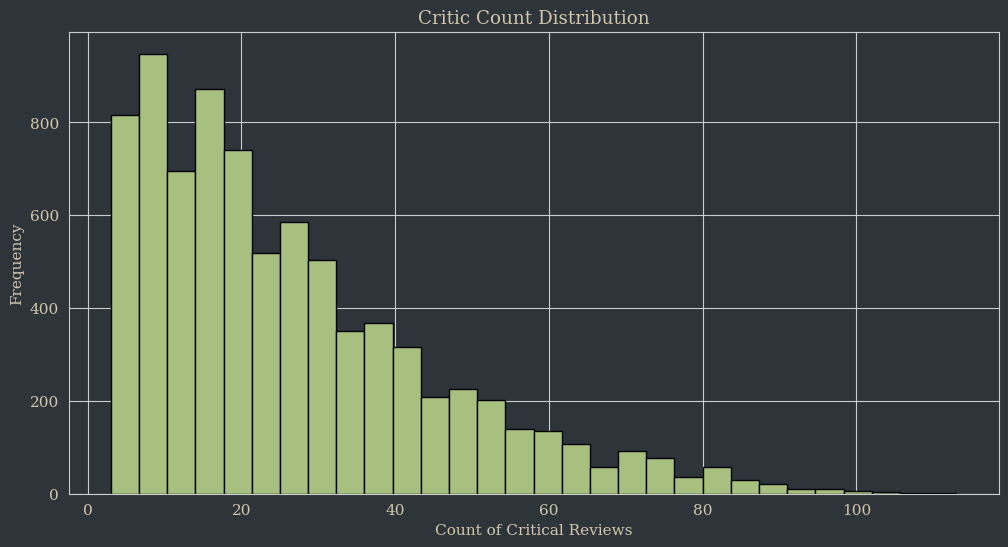

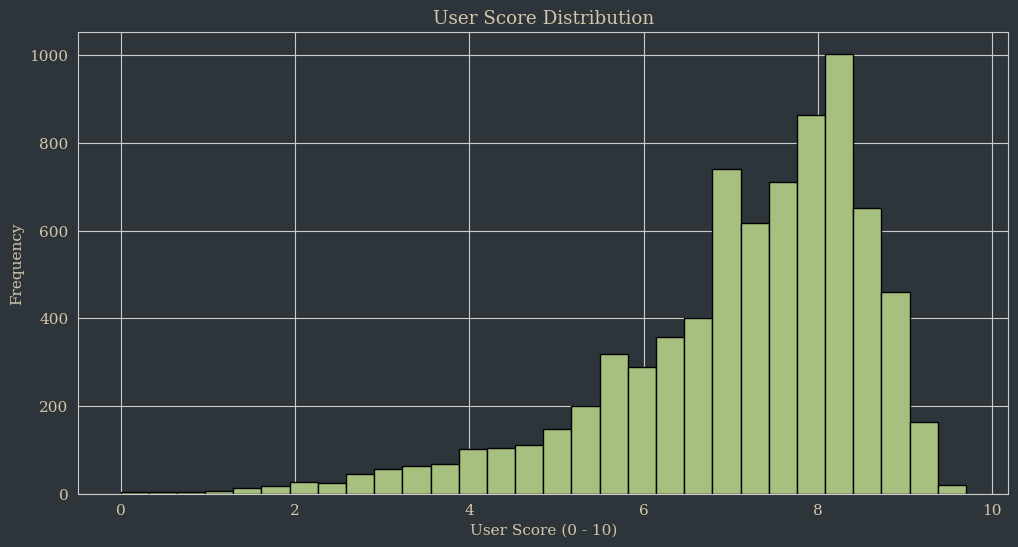

In [33]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Global_Sales'], vert=False)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales (millions)')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['Critic_Score'], bins=30, edgecolor='black')
plt.title('Critic Score Distribution')
plt.xlabel('Critic Score (0 - 100)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['Critic_Count'], bins=30, edgecolor='black')
plt.title('Critic Count Distribution')
plt.xlabel('Count of Critical Reviews')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(pd.to_numeric(df['User_Score'], errors='coerce'), bins=30, edgecolor='black')
plt.title('User Score Distribution')
plt.xlabel('User Score (0 - 10)')
plt.ylabel('Frequency')
plt.show()


### Categorical Variables

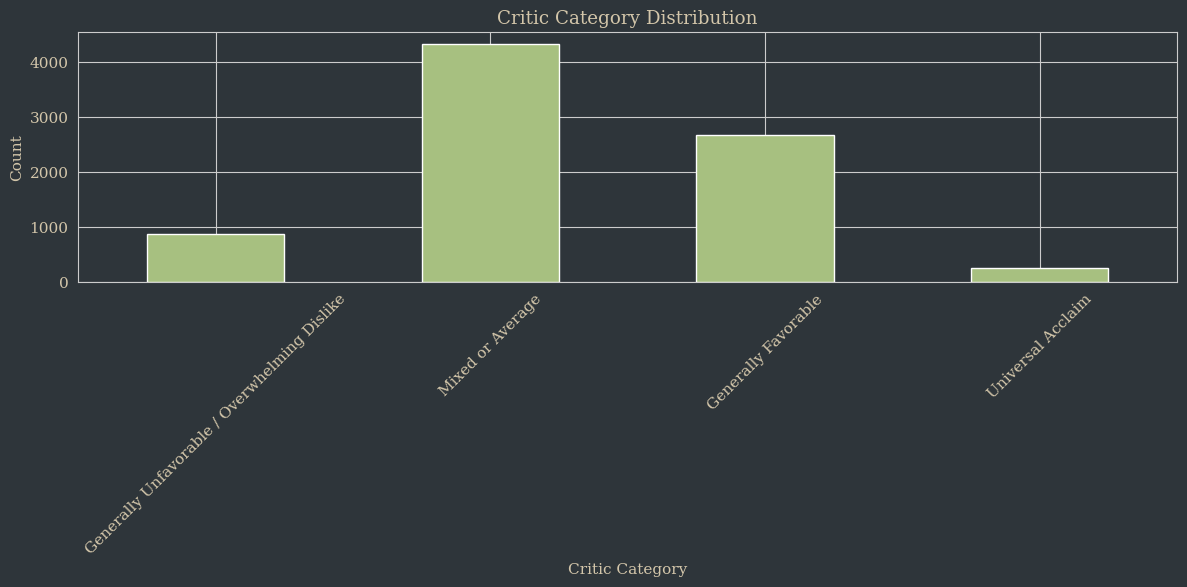

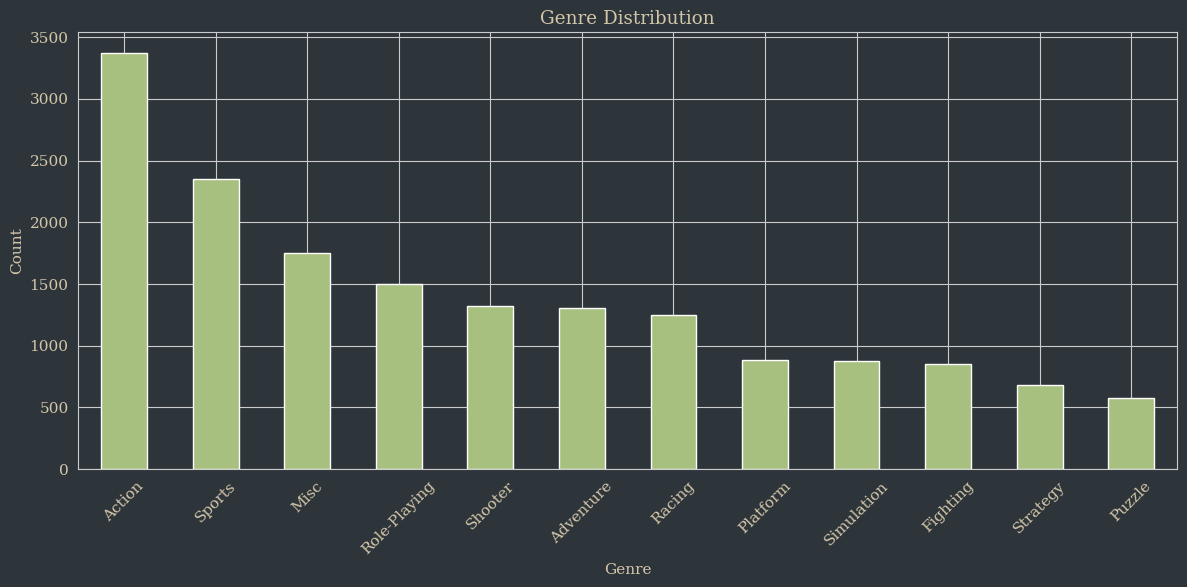

In [34]:
category_order = ['Generally Unfavorable / Overwhelming Dislike', 'Mixed or Average', 'Generally Favorable', 'Universal Acclaim']
plt.figure(figsize=(12, 6))
df['critic_category'].value_counts().reindex(category_order).plot(kind='bar')
plt.title('Critic Category Distribution')
plt.xlabel('Critic Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.2 Target-Conditioned Plots

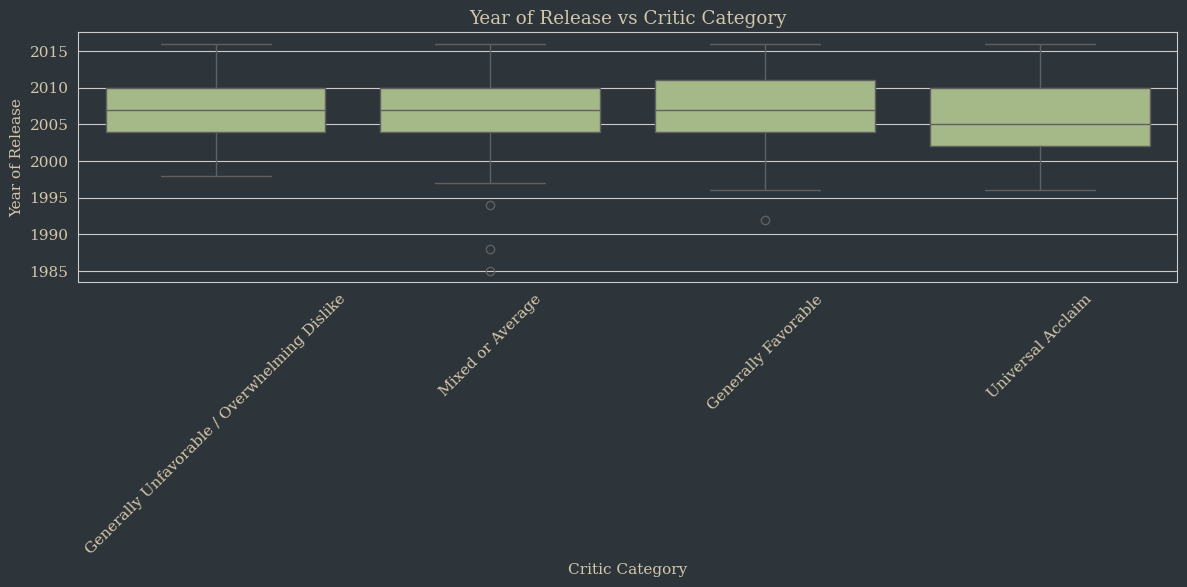

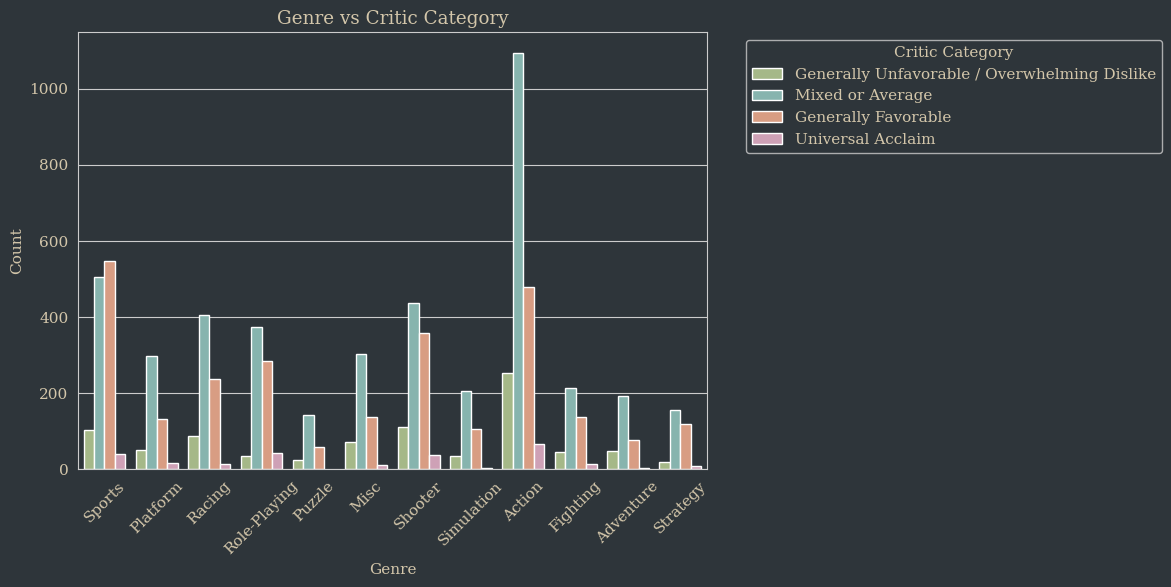

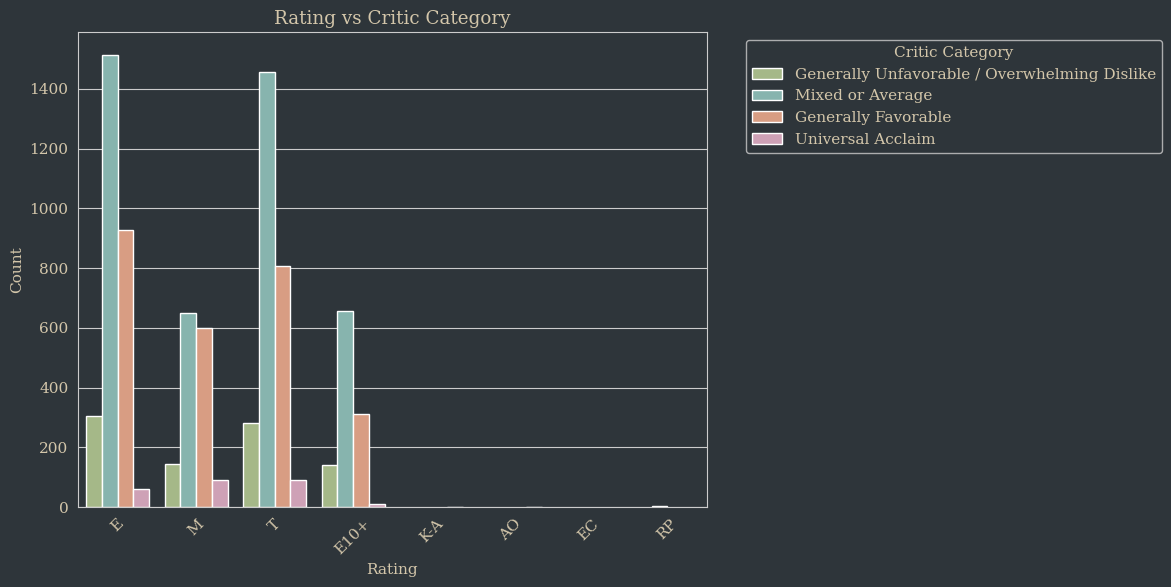

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='critic_category', y='Year_of_Release')
plt.title('Year of Release vs Critic Category')
plt.xlabel('Critic Category')
plt.ylabel('Year of Release')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Genre', hue='critic_category')
plt.title('Genre vs Critic Category')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Critic Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Rating', hue='critic_category')
plt.title('Rating vs Critic Category')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Critic Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4.3 Correlation Analysis

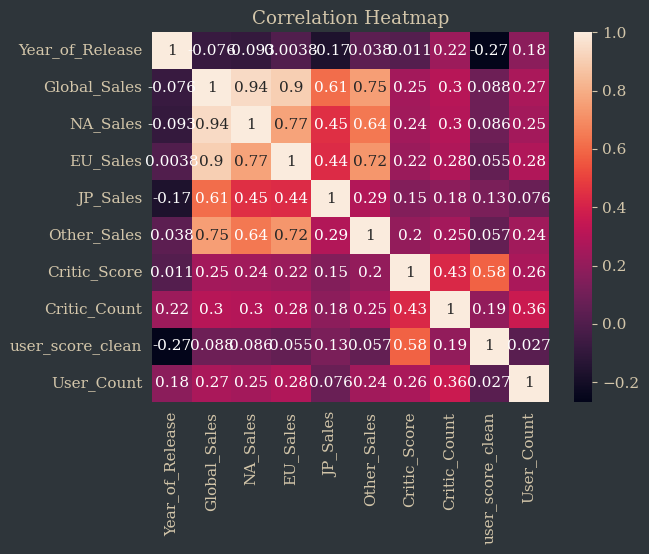

In [36]:
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Part 5: Principal Component Analysis (Unsupervised)

## 5.1 PCA Model Fitting

In [37]:
pca = PCA()
pca_result = pca.fit_transform(X_train)

## 5.2 Explained Variance Ratios

In [38]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[5.23267394e-02 4.23809132e-02 3.45755559e-02 3.08696805e-02
 2.77174175e-02 2.59320589e-02 2.50360130e-02 2.31433580e-02
 2.25064184e-02 2.15264433e-02 2.07942543e-02 2.03650986e-02
 1.98889337e-02 1.95242644e-02 1.90130408e-02 1.87533455e-02
 1.80794341e-02 1.78159016e-02 1.77565205e-02 1.74684343e-02
 1.72592680e-02 1.68813164e-02 1.65107875e-02 1.64497865e-02
 1.58819269e-02 1.58173002e-02 1.56946828e-02 1.54487997e-02
 1.53911288e-02 1.50867362e-02 1.50364292e-02 1.48468140e-02
 1.47033676e-02 1.45387173e-02 1.44228164e-02 1.42327616e-02
 1.39709468e-02 1.37786101e-02 1.35241245e-02 1.31231366e-02
 1.26425195e-02 1.24965727e-02 1.24582535e-02 1.21637816e-02
 1.19257145e-02 1.16114866e-02 1.08825356e-02 1.05748831e-02
 1.03952560e-02 1.02256395e-02 9.97667173e-03 9.72477972e-03
 8.85861058e-03 7.67177300e-03 7.21569324e-03 6.62146644e-03
 6.43888531e-03 6.17817909e-03 5.65445737e-03 4.98796906e-03
 4.40755087e-03 2.87176007e-03 2.20253502e-03 2.02612520e-03
 1.03720029e-03 3.977401

In [39]:
np.cumsum(explained_variance_ratio)

array([0.05232674, 0.09470765, 0.12928321, 0.16015289, 0.18787031,
       0.21380237, 0.23883838, 0.26198174, 0.28448815, 0.3060146 ,
       0.32680885, 0.34717395, 0.36706288, 0.38658715, 0.40560019,
       0.42435354, 0.44243297, 0.46024887, 0.47800539, 0.49547383,
       0.51273309, 0.52961441, 0.5461252 , 0.56257498, 0.57845691,
       0.59427421, 0.60996889, 0.62541769, 0.64080882, 0.65589556,
       0.67093199, 0.6857788 , 0.70048217, 0.71502089, 0.7294437 ,
       0.74367647, 0.75764741, 0.77142602, 0.78495015, 0.79807328,
       0.8107158 , 0.82321238, 0.83567063, 0.84783441, 0.85976012,
       0.87137161, 0.88225415, 0.89282903, 0.90322429, 0.91344993,
       0.9234266 , 0.93315138, 0.94200999, 0.94968176, 0.95689745,
       0.96351892, 0.96995781, 0.97613598, 0.98179044, 0.98677841,
       0.99118596, 0.99405772, 0.99626026, 0.99828638, 0.99932358,
       0.99972132, 0.99999676, 0.99999989, 1.        , 1.        ])

## 5.3 Scree Plot

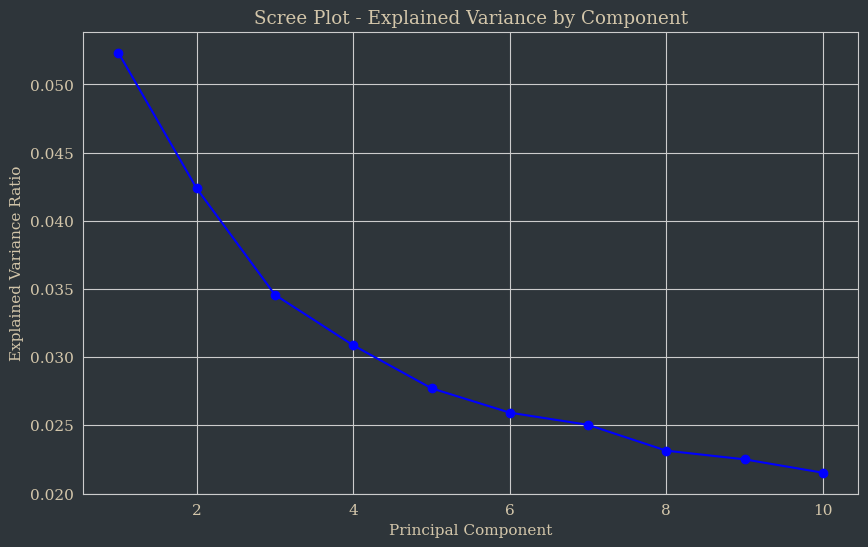

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance_ratio[:10], 'bo-')
plt.title('Scree Plot - Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

The above Scree plot shows that PC1 and PC2 explain the most variance at 5.2% and 4.2%, followed by a steep dropoff and gradual decline of variance explained in the later principal components. This confirms that the data is complex and highly dimensional, with very distributed variance.

## 5.4 PCA Scatter Plot

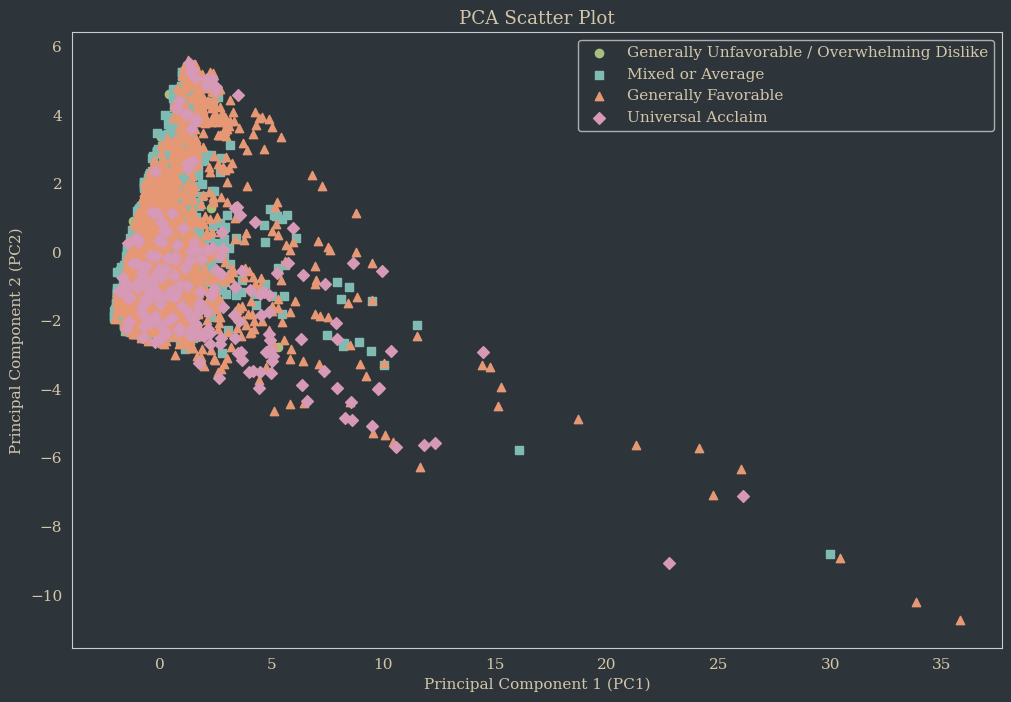

In [41]:
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'target': y_train.cat.codes
})

target_names = y_train.cat.categories
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(pca_df.loc[pca_df['target'] == i, 'PC1'],
                pca_df.loc[pca_df['target'] == i, 'PC2'],
                label=target_name, marker=markers[i])

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Scatter Plot')
plt.legend()
plt.grid()
plt.show()

The above scatterplot shows where individual games lie on a 2D plot of PC1 and PC2, with color/shape coding to indicate our critical score categories. The significant overlap of the critical score categories shows that the PC1 and PC2 data patterns (which I will discuss below, in section 5.5) don't effectively distinguish between critical quality levels. From a business perspective, this tells me that critical response to a game is a very complex and nuanced outcome.

In [42]:
feature_names = X.columns
pc1_features = pd.Series(pca.components_[0], index=feature_names).abs().sort_values(ascending=False)
pc2_features = pd.Series(pca.components_[1], index=feature_names).abs().sort_values(ascending=False)

In [43]:
pc1_features.head(10)

Global_Sales          0.404746
JP_Sales              0.365230
NA_Sales              0.364443
EU_Sales              0.359019
Other_Sales           0.337074
Developer_Nintendo    0.307009
Publisher_Nintendo    0.246304
Developer_Other       0.204038
Publisher_Other       0.165987
Rating_E              0.136028
dtype: float64

In [44]:
pc2_features.head(10)

Rating_E                     0.386190
Genre_Sports                 0.366101
Developer_Other              0.289871
Publisher_Electronic Arts    0.281128
Year_of_Release              0.235201
Rating_M                     0.221180
Developer_EA Sports          0.210954
Developer_EA Canada          0.201888
Developer_EA Tiburon         0.152468
Rating_T                     0.151824
dtype: float64

The above lists of top contributing features for PC1 and PC2 suggest two game profiles that explain the most variance in the dataset: 

1. PC1 is our "commercially successful" bucket, dominated by sales figures and the developer/publisher Nintendo
2. PC2 is more complex: it is dominated by the "E for Everyone" rating, followed by the "sports" Genre and EA Sports publishers/developers. A significant amount of variance is also explained by "Developer_Other", and "M for Mature" rating, which is a fruitful area for further research.

# Part 6: Linear Discriminant Analysis (Supervised)

## 6.1 LDA Model Fitting

In [45]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit_transform(X_train, y_train)

## 6.2 LDA Scatter Plot

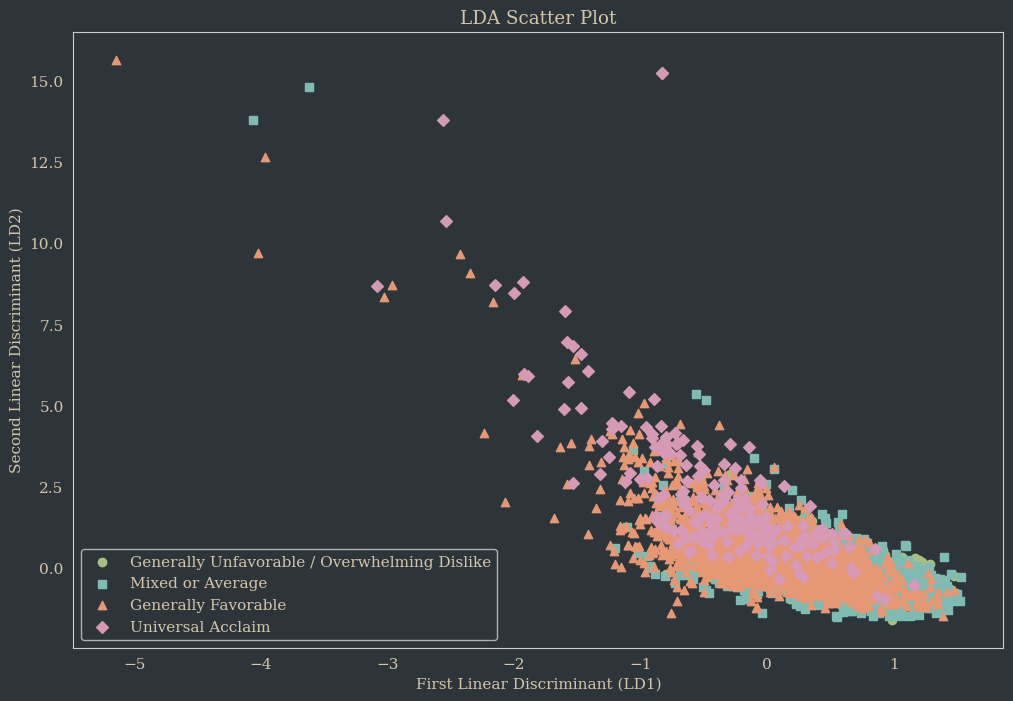

In [46]:
lda_df = pd.DataFrame({
    'LD1': lda_result[:, 0],
    'LD2': lda_result[:, 1],
    'target': y_train.cat.codes
})

target_names = y_train.cat.categories
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(lda_df.loc[lda_df['target'] == i, 'LD1'],
                lda_df.loc[lda_df['target'] == i, 'LD2'],
                label=target_name, marker=markers[i])

plt.xlabel('First Linear Discriminant (LD1)')
plt.ylabel('Second Linear Discriminant (LD2)')
plt.title('LDA Scatter Plot')
plt.legend()
plt.grid()
plt.show()

In our LDA scatterplot, we see the clear value of supervised learning in predictive analysis: there is distinct clustering of critical score categories (with some overlap), which contrasts sharply with PCA's mixed results. LDA was able to identify linear combinations of features that effectively separate critical quality levels.

## 6.3 Confusion Matrix and Classification Report

In [47]:
y_pred = lda.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 23   1 468  33]
 [  1   1 170   0]
 [  9   4 831   6]
 [  3   0  28  19]]
                                              precision    recall  f1-score   support

                         Generally Favorable       0.64      0.04      0.08       525
Generally Unfavorable / Overwhelming Dislike       0.17      0.01      0.01       172
                            Mixed or Average       0.56      0.98      0.71       850
                           Universal Acclaim       0.33      0.38      0.35        50

                                    accuracy                           0.55      1597
                                   macro avg       0.42      0.35      0.29      1597
                                weighted avg       0.53      0.55      0.42      1597



Unfortunately, the LDA shows generally poor accuracy (55%) and exhibits bias in that it is more effective at predicting the "Mixed or Average" class (which, as seen in EDA, is the largest class). From a business standpoint, a model that is only effective at identifying average critical response is not particularly useful.

## 6.4 PCA vs LDA Comparison

The ability of LDA to distinguish feature combinations that predict critical score category is a function of it being a supervised learning model. However, while LDA identified some patterns it struggled to translate them into reliable predictions (especially for the minority classes).

In contrast, PCA didn't distinguish between the critical score categories because that's not what it was designed to do: it was able to show us the the combination of features that explain the most variance in the dataset as a whole. It revealed the general patterns in our data, not patterns that predict a target.

# Part 7: Interpretation and Limitations

## 7.1 EDA Summary

### Critical vs. Commercial Success

In light of our PCA analysis, the distinction between critical and commercial success that was seen in EDA makes sense: PC1 was dominated by the commercial success features, but that didn't effectively discriminate between critical quality score categories.

### Complexity of Critical Quality

The PCA/LDA analysis confirms the observation from EDA that critical success is a complex and nuanced phenomenon which can't be easily explained by casual examination. Critical quality explains little overall variance in the PCA, and while the LDA had some success in predicting critical score it was heavily biased. This provides a quantitative explanation for something that critics themselves would likely assert based on intuition: the quality of a work of art is a combination of many subtle, interconnected features. 

## 7.2 Preprocessing Effects on PCA/LDA

One-hot encoding was essential for bringing categorical variables into the models, I can tell we're going to be doing that a lot!

This made feature scaling even more critical, in order to prevent the large scale of the sales figures from exercising outsized influence compared to our binary categorical features.


## 7.3 Limitations and Next Steps

A notable limitation of LDA is that it requires the assumptions of linearity be met. This wasn't confirmed prior to modeling, and may explain some of the issues with model performance. Another possible issue is class imbalance: I took a light approach in feature engineering, but may have left too much imbalance in the dataset.

Ultimately, the LDA model's bias limits its usefulness. Different binning or sampling approaches may be more fruitful than the ones used here, but it seems likely that a different approach might be needed to predict critical scores from this data.

# Colophon

This notebook was written entirely in Jupyter running in a Miniconda environment on Ubuntu 22.04 running under WSL. 

The PDF report was generated from Typora using the Everforest theme.

Claude.ai was used for generating markdown tables, repetitive code repurposing, plot formatting (to match the Everforest theme), and moral support.